# Capstone Project - 02b EDA Phase 2 - Pandas

## Introduction

In this section, I prepare visualizations and look more closely at the correlations between each of the variables and the prevalence of diabetes. For now, I continue to use the 2013 diabetes prevalence values provided in the Food Environment Atlas for consistency/continuity before attempting to connect the 2018 values, which are from a different dataset.

In [1]:
#imports necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## I. Health

### 1. Data Import

In [2]:
#imports the data as a dataframe

file_path = '../data/FoodEnvironmentAtlas.xls.HEALTH_CLEAN.csv'

health = pd.read_csv(file_path)

In [3]:
health.head() #displays top 5 rows of dataframe

fips state   county  pct_diabetes_adults08  pct_diabetes_adults13  \
0  1001    AL  Autauga                   11.4                   13.0   
1  1003    AL  Baldwin                    9.8                   10.4   
2  1005    AL  Barbour                   13.6                   18.4   
3  1007    AL     Bibb                   11.1                   14.8   
4  1009    AL   Blount                   11.4                   14.1   

   pct_obese_adults12  pct_obese_adults17  pct_hspa17  recfac11  recfac16  \
0                33.0                36.3         NaN         4         6   
1                33.0                36.3         NaN        16        21   
2                33.0                36.3         NaN         2         0   
3                33.0                36.3         NaN         0         1   
4                33.0                36.3         NaN         3         4   

   pch_recfac_11_16  recfacpth11  recfacpth16  pch_recfacpth_11_16  
0         50.000000     0.072465     0.108542            49.785629  
1         31.250000     0.085775     0.101200            17.983256  
2       -100.000000     0.073123     0.000000          -100.000000  
3               NaN     0.000000     0.044183                  NaN  
4         33.333333     0.052118     0.069490            33.333333

In [4]:
health.shape

(3143, 14)

In [5]:
health.columns #lists column names

Index(['fips', 'state', 'county', 'pct_diabetes_adults08',
       'pct_diabetes_adults13', 'pct_obese_adults12', 'pct_obese_adults17',
       'pct_hspa17', 'recfac11', 'recfac16', 'pch_recfac_11_16', 'recfacpth11',
       'recfacpth16', 'pch_recfacpth_11_16'],
      dtype='object')

#### Distribution - Prevalence of Obesity (2012)

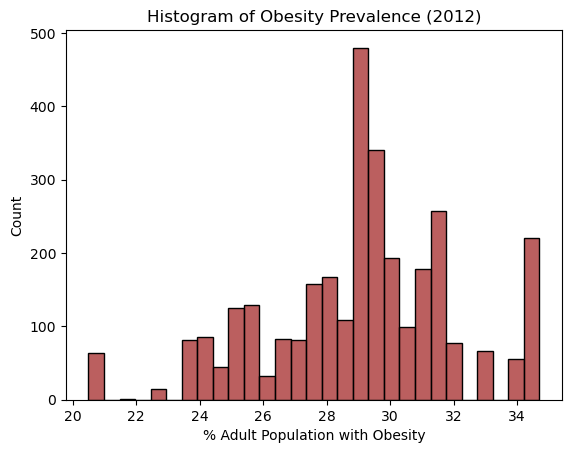

In [6]:
sns.histplot(data= health, x='pct_obese_adults12', color = 'brown').set(
    title= 'Histogram of Obesity Prevalence (2012)', xlabel = '% Adult Population with Obesity');

It appears that a prevalence of approximately 29% is common among states.

#### Correlations

First, I would like to observe for correlations between the variables.

Specifically, I am interested in looking at correlations between variables that are of the same year, or within 1 year of each other.

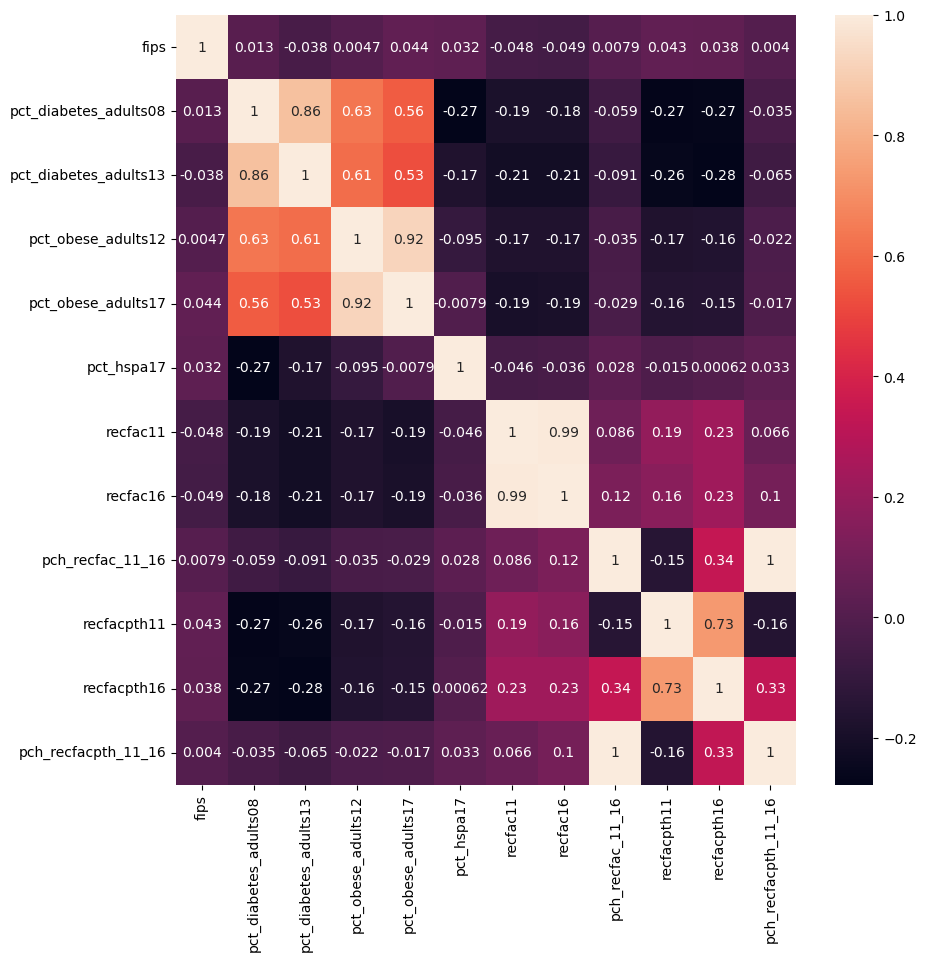

In [7]:
fig, ax = plt.subplots(figsize = (10,10))

sns.heatmap(health.corr(), annot = True); #displays a heatmap showing correlations between variables

##### Summary

When observing the diabetes prevalence from 2013, the highest correlated variable (other than 2008 prevalence of diabetes) is the 2012 prevalence of diabetes (0.61.) Even the 2017 prevalence of obesity is strongly correlated with diabetes 2013 at 0.53.

Still, I the recreational facilities per 1000 people and percent high schoolers physically active variables do have negative correlations with the prevalence of diabetes at rates between 0.2 and 0.3. These will be of some use during modeling.

##### Case Study

In [8]:
#creates a subset of Eagle County, CO and Lowndes County, GA

case_health = health.loc[(health['county'] == 'Eagle') | ((health['county'] == 'Lowndes') & (health['state'] == 'AL'))]

case_health #displays subset

fips state   county  pct_diabetes_adults08  pct_diabetes_adults13  \
42   1085    AL  Lowndes                   17.1                   23.5   
263  8037    CO    Eagle                    3.0                    3.3   

     pct_obese_adults12  pct_obese_adults17  pct_hspa17  recfac11  recfac16  \
42                 33.0                36.3         NaN         1         1   
263                20.5                22.6        27.4         9        10   

     pch_recfac_11_16  recfacpth11  recfacpth16  pch_recfacpth_11_16  
42           0.000000     0.089847     0.097647             8.680793  
263         11.111111     0.173437     0.183945             6.058748

Below are bar plots showing the differences between Eagle County, CO and Lowndes County, GA.

In [9]:
case_health_df = pd.DataFrame(case_health) #turns the subset into a dataframe

*Prevalence of Obesity (2012)*

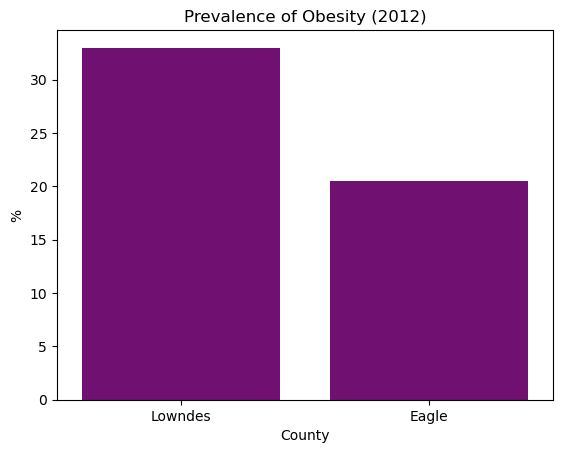

In [10]:
sns.barplot(data= case_health_df, x='county', y='pct_obese_adults12', color = 'purple').set(
    title = 'Prevalence of Obesity (2012)', xlabel= 'County', ylabel='%');

Lowndes County has a higher percentage of obesity.

*Number of Recreational Facilities per 1000 (2011)*

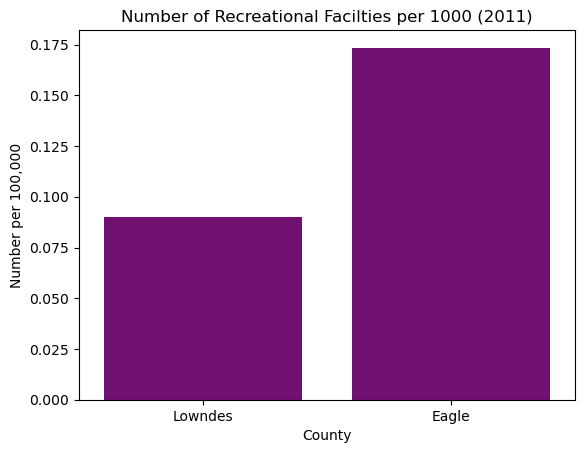

In [11]:
sns.barplot(data= case_health_df, x='county', y='recfacpth11', color = 'purple').set(
    title = 'Number of Recreational Facilties per 1000 (2011)', xlabel = 'County', ylabel = 'Number per 100,000');

Lowndes County has a lower number of recreational/fitness facilities per 1000 population.

*Prevalence of Diabetes (2013)*

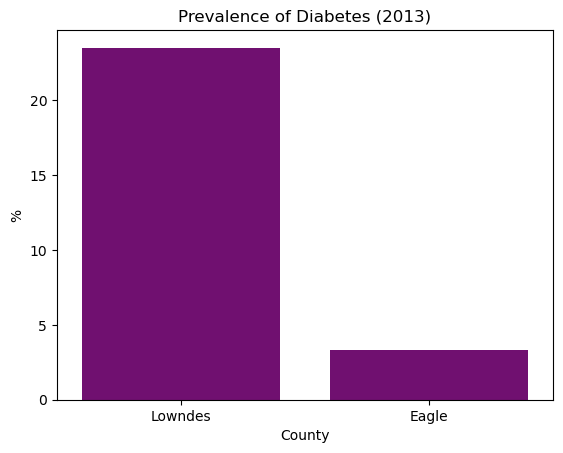

In [12]:
sns.barplot(data= case_health_df, x='county', y='pct_diabetes_adults13', color = 'purple').set(
    title = 'Prevalence of Diabetes (2013)', xlabel = 'County', ylabel = '%');

At 23.5%, Lowndes County has the highest prevalence of diabetes, whereas Eagle County has the lowest at 3.3%.

##### Observations

It becomes clear through visualization the differences in terms of prevalence of obesity and the number of recreational facilities that are available, that contribute to the difference in prevalence of diabetes.

## II. Access

Earlier in the EDA process, I was not able to determine a relationship between the variables in this dataset and prevalence of diabetes. Below, I will take a closer look.

### 1. Data Import

In [13]:
#imports data

file_path = '../data/FoodEnvironmentAtlas.xls.ACCESS_CLEAN.csv'

access = pd.read_csv(file_path)

In [14]:
access.head()

fips state   county  pct_laccess_pop10  pct_laccess_pop15  \
0  1001    AL  Autauga          33.769657          32.062255   
1  1003    AL  Baldwin          19.318473          16.767489   
2  1005    AL  Barbour          20.840972          22.105560   
3  1007    AL     Bibb           4.559753           4.230324   
4  1009    AL   Blount           2.700840           6.497380   

   pct_laccess_lowi10  pct_laccess_lowi15  pct_laccess_hhnv10  \
0            9.793530           11.991125            3.284786   
1            5.460261            5.424427            2.147827   
2           11.420316           10.739667            4.135869   
3            2.144661            2.601627            3.458580   
4            1.062468            2.880150            3.269380   

   pct_laccess_hhnv15  pct_laccess_snap15  pct_laccess_child10  \
0            3.351332            4.608749             8.837112   
1            1.905114            1.298900             4.343199   
2            4.329378            4.303147             3.425062   
3            2.821427            0.676710             1.087518   
4            3.336414            0.812727             0.671490   

   pct_laccess_child15  pct_laccess_seniors10  pct_laccess_seniors15  
0             8.460485               4.376378               3.996279  
1             3.844936               3.513570               3.061840  
2             3.758341               2.805166               3.001695  
3             1.015242               0.657008               0.600865  
4             1.588720               0.340269               0.882583

In [15]:
access.shape

(3143, 14)

#### Distribution - Low Access to Stores + No Vehicle

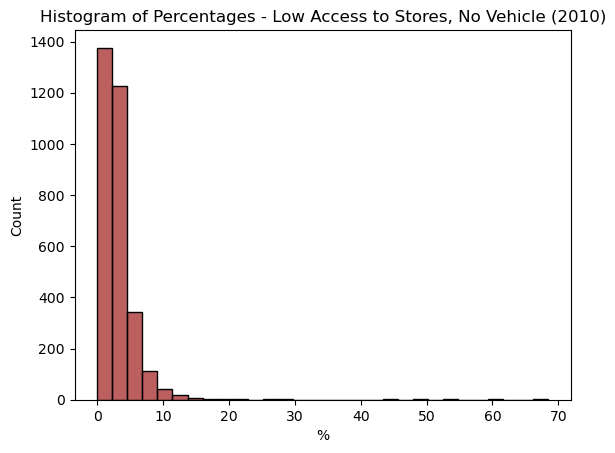

In [16]:
sns.histplot(data= access, x= 'pct_laccess_hhnv10', bins = 30, color = 'brown').set(
title= 'Histogram of Percentages - Low Access to Stores, No Vehicle (2010)', xlabel = '%');

It appears in most counties, 0-5% of the population has low access stores + no vehicle...however, it appears that values extend as as high as almost 70%.

#### Correlations

Since the Food Environment Atlas assesses the same counties(and has the same number of rows as the health dataset, and in the same order), I will add the diabetes 2013 column into this dataset in order to observe the correlations.

In [17]:
access['pct_diabetes_adults13'] = health['pct_diabetes_adults13'] #adds the % diabetes 2013 into the access dataset

access.columns #shows a revised list of columns

Index(['fips', 'state', 'county', 'pct_laccess_pop10', 'pct_laccess_pop15',
       'pct_laccess_lowi10', 'pct_laccess_lowi15', 'pct_laccess_hhnv10',
       'pct_laccess_hhnv15', 'pct_laccess_snap15', 'pct_laccess_child10',
       'pct_laccess_child15', 'pct_laccess_seniors10', 'pct_laccess_seniors15',
       'pct_diabetes_adults13'],
      dtype='object')

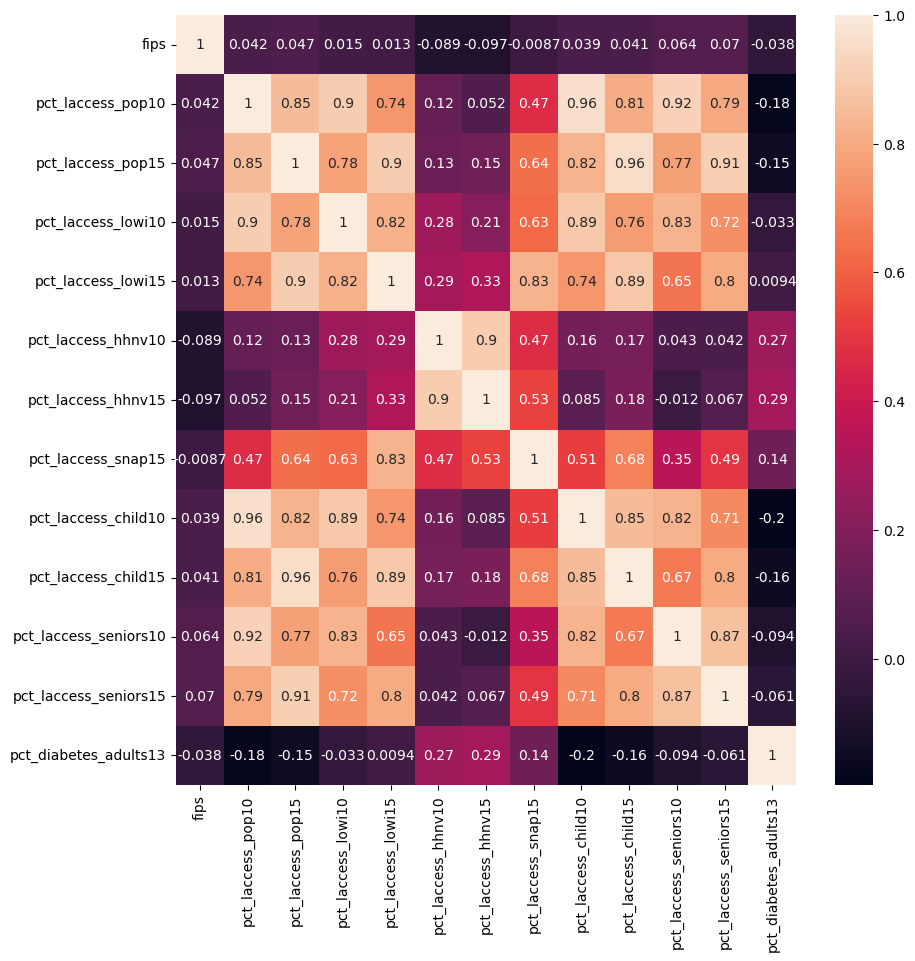

In [18]:
fig, ax = plt.subplots(figsize = (10,10))

sns.heatmap(access.corr(), annot = True); #shows the a heatmap of the data

As for the prevalence of low access to stores, these actually show weak, negative correlations with the prevalence of diabetes (2013.) The same is true for the child and seniors low access to stores. Meanwhile, the low access-low income variables show the weakest correlations with prevalence of diabetes in this dataset.

Meanwhile, there are fair correlations (between 0.2 and 0.3) on the columns that include lack of a vehicle (pct_laccess_hhnv10, pct_laccess_hhnv15.) These are the strongest correlations with prevalence of diabetes seen in this dataset. I am more likely to use these features during later modeling. 

##### Case Study

In [19]:
#creates a subset of Eagle County, CO and Lowndes County, GA

case_access = access.loc[(access['county'] == 'Eagle') | ((access['county'] == 'Lowndes') & (access['state'] == 'AL'))]

case_access #displays subset

fips state   county  pct_laccess_pop10  pct_laccess_pop15  \
42   1085    AL  Lowndes          48.700787          22.478665   
263  8037    CO    Eagle          15.267278          15.437566   

     pct_laccess_lowi10  pct_laccess_lowi15  pct_laccess_hhnv10  \
42             26.21925           13.062145           12.712164   
263             4.22753            4.157916            0.938510   

     pct_laccess_hhnv15  pct_laccess_snap15  pct_laccess_child10  \
42            10.474890            6.562970            11.231591   
263            0.752028            0.373313             3.836535   

     pct_laccess_child15  pct_laccess_seniors10  pct_laccess_seniors15  \
42              6.294811               7.386135               3.138164   
263             3.729324               0.825025               0.921347   

     pct_diabetes_adults13  
42                    23.5  
263                    3.3

In [20]:
case_access_df = pd.DataFrame(case_access)

*Prevalence of Low Access to Stores & No Vehicle*

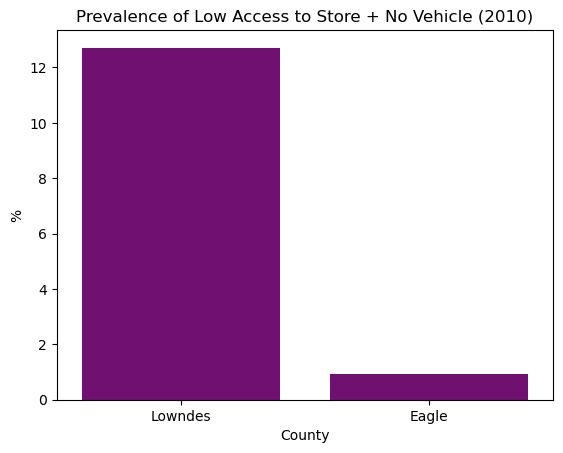

In [21]:
sns.barplot(data=case_access_df, x='county', y='pct_laccess_hhnv10', color = 'purple').set(
    title= 'Prevalence of Low Access to Store + No Vehicle (2010)', xlabel = 'County', ylabel = '%');

Lowndes County has a higher prevalence of more than 12 percent, while Eagle County's prevalence is less than 2%.

##### Observations

The percentage of people with low access to stores and no vehicle is much higher in Lowndes County.

## III. Assistance

As these variables are state-level, I previously compared the assistance data with obesity data, which is also state lovel. However, I would like to observe how these variables may relate to prevalence of diabetes.

In [22]:
#imports the data
file_path = '../data/FoodEnvironmentAtlas.xls.ASSISTANCE_CLEAN.csv' 

assistance = pd.read_csv(file_path)

In [23]:
assistance.head() #shows first 5 rows of dataframe

fips state   county  pct_snap12  pct_snap17  snap_part_rate11  \
0  1001    AL  Autauga   18.908476   16.500056             84.02   
1  1003    AL  Baldwin   18.908476   16.500056             84.02   
2  1005    AL  Barbour   18.908476   16.500056             84.02   
3  1007    AL     Bibb   18.908476   16.500056             84.02   
4  1009    AL   Blount   18.908476   16.500056             84.02   

   snap_part_rate16  pct_nslp12  pct_nslp17  pct_sbp12  ...  pct_wic17  \
0            86.898   68.226043    63.12659  27.206328  ...    2.54357   
1            86.898   68.226043    63.12659  27.206328  ...    2.54357   
2            86.898   68.226043    63.12659  27.206328  ...    2.54357   
3            86.898   68.226043    63.12659  27.206328  ...    2.54357   
4            86.898   68.226043    63.12659  27.206328  ...    2.54357   

   pct_wicinfantchild14  pct_wicinfantchild16  pct_wicwomen14  pct_wicwomen16  \
0             33.481211             32.910876        3.318827        3.309759   
1             33.481211             32.910876        3.318827        3.309759   
2             33.481211             32.910876        3.318827        3.309759   
3             33.481211             32.910876        3.318827        3.309759   
4             33.481211             32.910876        3.318827        3.309759   

   pct_cacfp12  pct_cacfp17  fdpir12  fdpir15  food_banks18  
0     0.891239     1.258763        0        0             0  
1     0.891239     1.258763        0        0             0  
2     0.891239     1.258763        0        0             0  
3     0.891239     1.258763        0        0             0  
4     0.891239     1.258763        0        0             0  

[5 rows x 22 columns]

In [24]:
assistance.shape

(3143, 22)

In [25]:
assistance.columns

Index(['fips', 'state', 'county', 'pct_snap12', 'pct_snap17',
       'snap_part_rate11', 'snap_part_rate16', 'pct_nslp12', 'pct_nslp17',
       'pct_sbp12', 'pct_sbp17', 'pct_wic12', 'pct_wic17',
       'pct_wicinfantchild14', 'pct_wicinfantchild16', 'pct_wicwomen14',
       'pct_wicwomen16', 'pct_cacfp12', 'pct_cacfp17', 'fdpir12', 'fdpir15',
       'food_banks18'],
      dtype='object')

#### Distribution - Percentage of Population Participating in SNAP (2012)

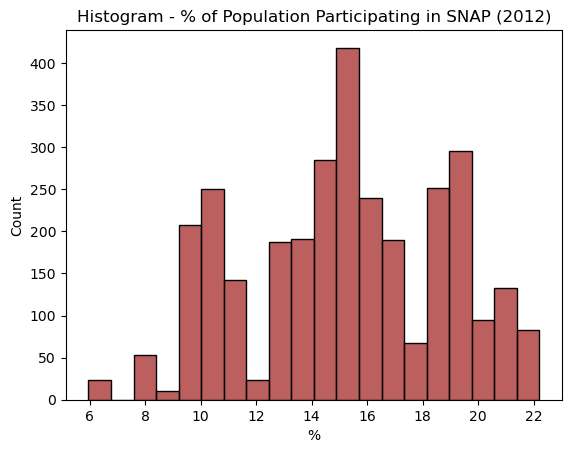

In [26]:
sns.histplot(data=assistance, x='pct_snap12', color = 'brown').set(
    title= 'Histogram - % of Population Participating in SNAP (2012)', xlabel = '%');

It appears that a percentage of approximately 15% is common.

#### Correlations

With 22 columns, it is difficult to observe all of the information. I will divide this data into smaller datasets for processing.

In [27]:
assistance['pct_diabetes_adults13'] = health['pct_diabetes_adults13'] #adds prevalence 2013 column to dataset

assistance.columns #shows revised list of columns

Index(['fips', 'state', 'county', 'pct_snap12', 'pct_snap17',
       'snap_part_rate11', 'snap_part_rate16', 'pct_nslp12', 'pct_nslp17',
       'pct_sbp12', 'pct_sbp17', 'pct_wic12', 'pct_wic17',
       'pct_wicinfantchild14', 'pct_wicinfantchild16', 'pct_wicwomen14',
       'pct_wicwomen16', 'pct_cacfp12', 'pct_cacfp17', 'fdpir12', 'fdpir15',
       'food_banks18', 'pct_diabetes_adults13'],
      dtype='object')

In [28]:
assistance_snap_meals = assistance[['fips', 'state', 'county', 'pct_snap12', 'pct_snap17',
       'snap_part_rate11', 'snap_part_rate16', 'pct_nslp12', 'pct_nslp17',
       'pct_sbp12', 'pct_sbp17', 'pct_diabetes_adults13' ]] #creates a dataset for snap & free school meal data

assistance_other = assistance[['fips', 'state', 'county', 'pct_wic12', 'pct_wic17',
       'pct_wicinfantchild14', 'pct_wicinfantchild16', 'pct_wicwomen14',
       'pct_wicwomen16', 'pct_cacfp12', 'pct_cacfp17', 'fdpir12', 'fdpir15',
       'food_banks18', 'pct_diabetes_adults13' ]] #creates a dataset for wic, child/adult care programs, fdir, and food banks 

Now I will observe heatmaps. Since the datasets are smaller, I will add the correlation chart into the heatmap.

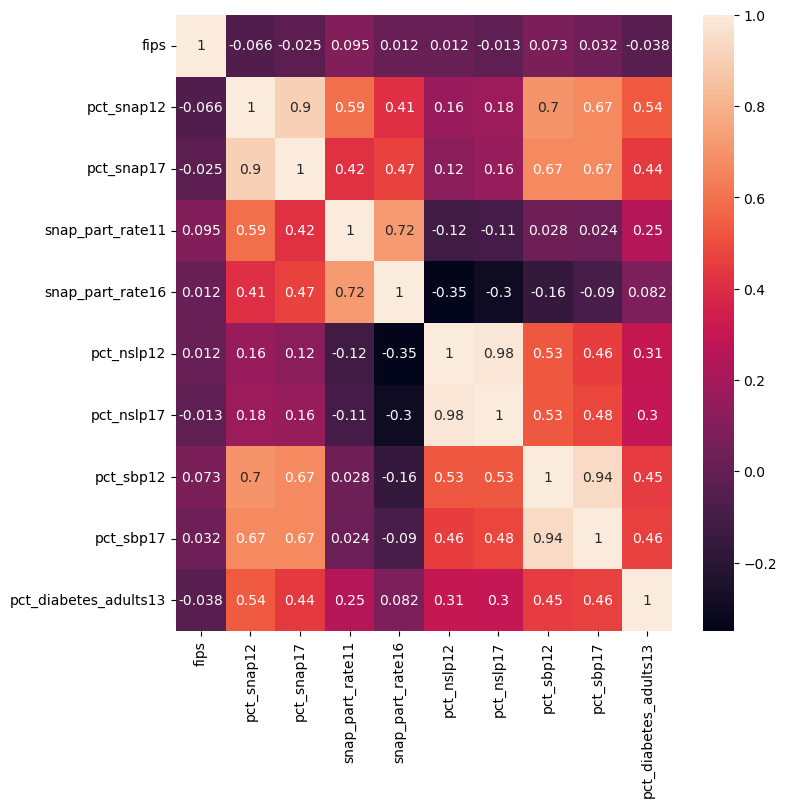

In [29]:
fig, ax = plt.subplots(figsize = (8,8))

sns.heatmap(assistance_snap_meals.corr(), annot = True); #shows a heatmap for this dataset

SNAP participation rates (pct_snap) correlate with prevalence of diabetes with a value of ~0.5 (depending on the year of assessment). Additionally, participation rate in the school breakfast program (pct_sbbp) correlates with prevalence of diabetes at  ~0.45 (depending on the year.)

These are the strongest correlations in the dataset, although, participation in school lunch programs (pct_nslp) correlate with prevalence of diabetes with a value of ~.3.

These variables will likely be of use during modeling. I will now move on to the second access dataset.

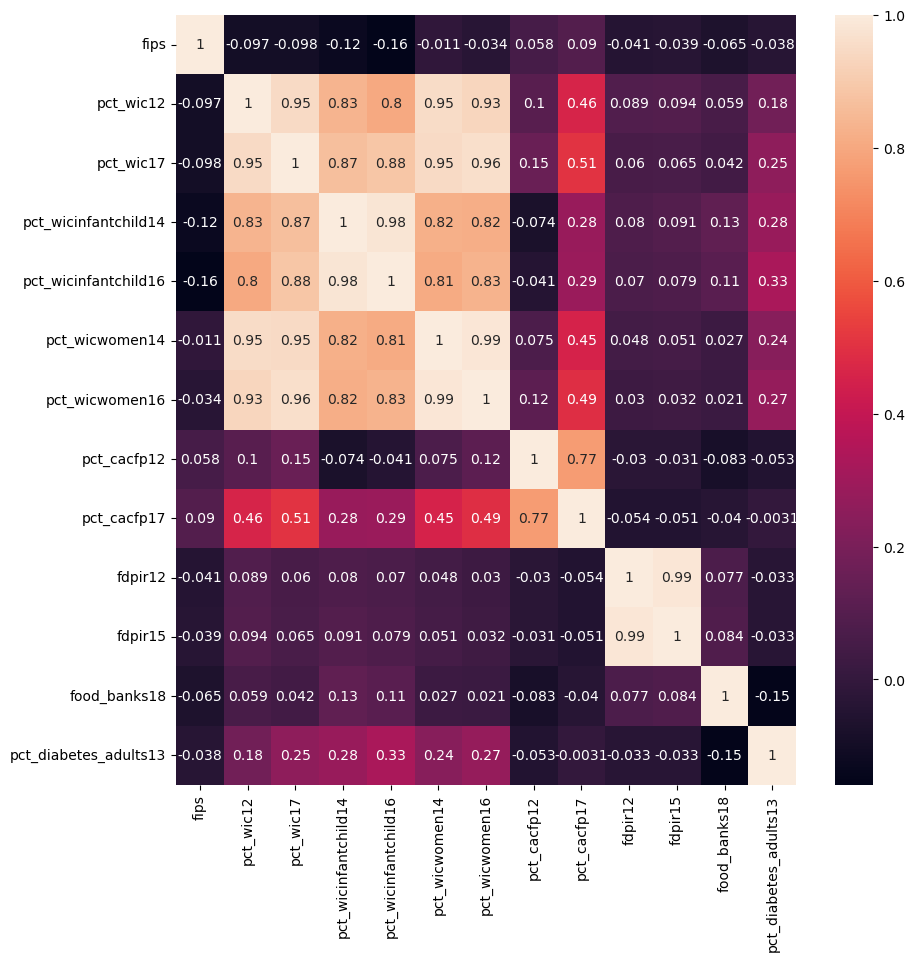

In [30]:
fig, ax = plt.subplots(figsize = (10,10))

sns.heatmap(assistance_other.corr(), annot = True); #creates a heatmap with correlations within

The variables most highly correlated with prevalence of diabetes are WIC participation (pct_wic, ~0.2), WIC women/infant/child (pct_wicinfantchild, ~0.3,) and WIC women (pct_wicwomen, ~0.25.)

I will keep these in mind when the time for modeling comes.

##### Case Study

In [31]:
#creates a subset of Eagle County, CO and Lowndes County, GA

case_assistance = assistance.loc[(assistance['county'] == 'Eagle') | ((assistance['county'] == 'Lowndes') 
                                                                      & (assistance['state'] == 'AL'))]

case_assistance #displays subset

fips state   county  pct_snap12  pct_snap17  snap_part_rate11  \
42   1085    AL  Lowndes   18.908476   16.500056            84.020   
263  8037    CO    Eagle    9.479336    8.190382            67.243   

     snap_part_rate16  pct_nslp12  pct_nslp17  pct_sbp12  ...  \
42             86.898   68.226043   63.126590  27.206328  ...   
263            78.183   44.340828   40.200015  16.255120  ...   

     pct_wicinfantchild14  pct_wicinfantchild16  pct_wicwomen14  \
42              33.481211             32.910876        3.318827   
263             20.596559             19.168389        2.158666   

     pct_wicwomen16  pct_cacfp12  pct_cacfp17  fdpir12  fdpir15  food_banks18  \
42         3.309759     0.891239     1.258763        0        0             0   
263        1.987091     0.627616     0.781546        0        0             0   

     pct_diabetes_adults13  
42                    23.5  
263                    3.3  

[2 rows x 23 columns]

In [32]:
case_assistance_df = pd.DataFrame(case_assistance)

*Percentage of Population Utilizing WIC%*

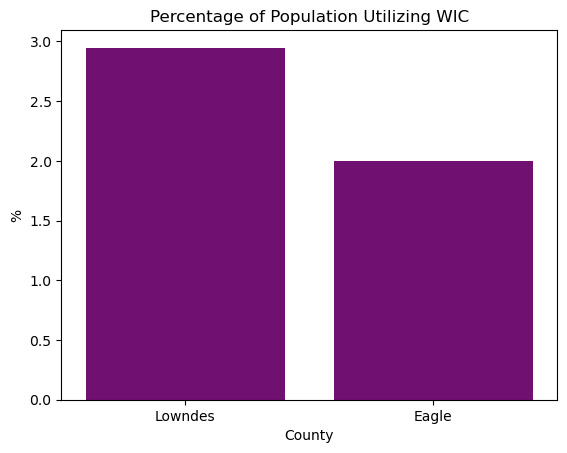

In [33]:
sns.barplot(data=case_assistance_df, x='county', y='pct_wic12', color = 'purple').set(
    title = 'Percentage of Population Utilizing WIC', xlabel = 'County', ylabel = '%');

##### Observations

Lowndes County had a higher percentage of its population utilizing WIC.

## IV. Insecurity

Previous EDA demonstrated a potential link between food insecurity/very low food security and prevalence of diabetes. Here, I will observe the correlations more closely.

In [34]:
file_path = '../data/FoodEnvironmentAtlas.xls.INSECURITY_CLEAN.csv'

insecurity = pd.read_csv(file_path)

In [35]:
insecurity.head()

fips state   county  foodinsec_12_14  foodinsec_15_17  ch_foodinsec_14_17  \
0  1001    AL  Autauga             16.8             16.3                -0.5   
1  1003    AL  Baldwin             16.8             16.3                -0.5   
2  1005    AL  Barbour             16.8             16.3                -0.5   
3  1007    AL     Bibb             16.8             16.3                -0.5   
4  1009    AL   Blount             16.8             16.3                -0.5   

   vlfoodsec_12_14  vlfoodsec_15_17  ch_vlfoodsec_14_17  
0              7.2              7.1                -0.1  
1              7.2              7.1                -0.1  
2              7.2              7.1                -0.1  
3              7.2              7.1                -0.1  
4              7.2              7.1                -0.1

In [36]:
insecurity.shape

(3143, 9)

In [37]:
insecurity.columns

Index(['fips', 'state', 'county', 'foodinsec_12_14', 'foodinsec_15_17',
       'ch_foodinsec_14_17', 'vlfoodsec_12_14', 'vlfoodsec_15_17',
       'ch_vlfoodsec_14_17'],
      dtype='object')

#### Distribution - Very Low Food Security (2012-2014)

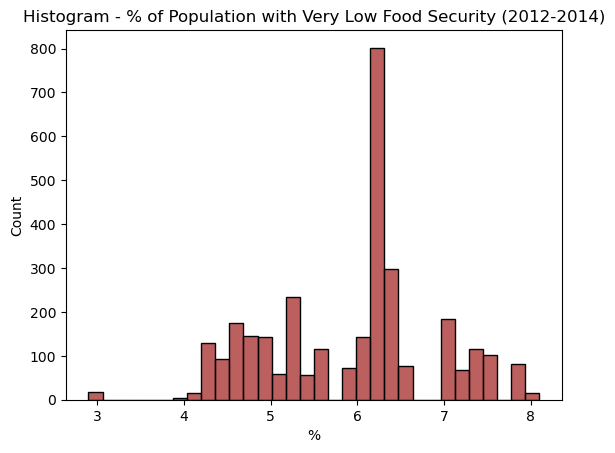

In [38]:
sns.histplot(data=insecurity, x= 'vlfoodsec_12_14', color = 'brown').set(
    title = 'Histogram - % of Population with Very Low Food Security (2012-2014)', xlabel = '%');

There seems to be a very high count of prevalences that are between 6 and 7%.

#### Correlations

I will add the percent diabetes 2013 information into this dataset in order to observe the correlations.

In [39]:
insecurity['pct_diabetes_adults13'] = health['pct_diabetes_adults13'] #adds in the diabetes prevalence

insecurity.columns #shows a revised list of columns

Index(['fips', 'state', 'county', 'foodinsec_12_14', 'foodinsec_15_17',
       'ch_foodinsec_14_17', 'vlfoodsec_12_14', 'vlfoodsec_15_17',
       'ch_vlfoodsec_14_17', 'pct_diabetes_adults13'],
      dtype='object')

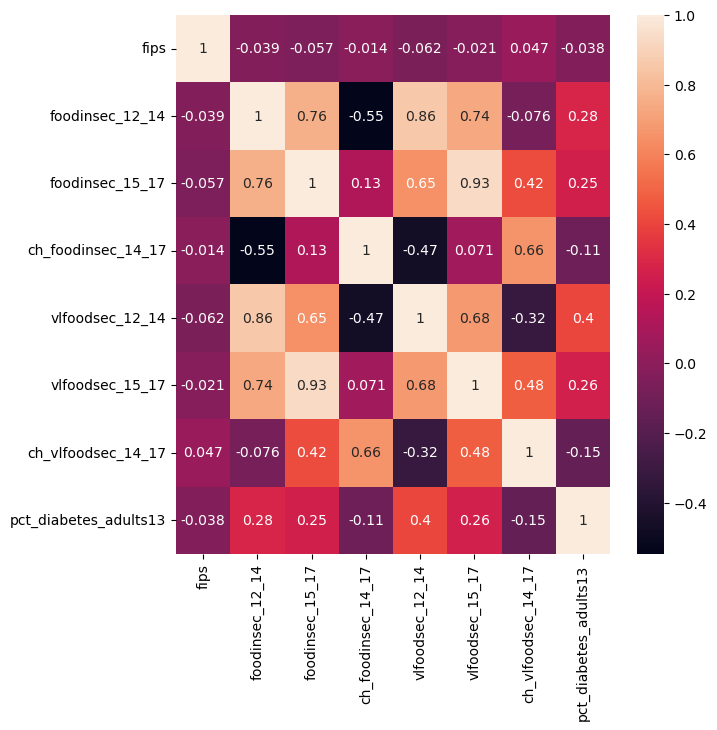

In [40]:
fig, ax = plt.subplots(figsize=(7,7))

sns.heatmap(insecurity.corr(), annot = True); #displays a heatmap containing correlation values

There is a moderate correlation (0.4) between very low food security from 2012-2014 (vlfoodsec_12_14) and prevalence of diabetes inm 2013. There is a fair correlation (0.28) between food insecurity and prevalence of diabetes in 2013.

As far as this dataset, these are the variables most likely to be influential during modeling.

##### Case Study

In [41]:
#creates a subset of Eagle County, CO and Lowndes County, GA

case_insecurity = insecurity.loc[(assistance['county'] == 'Eagle') | ((insecurity['county'] == 'Lowndes') 
                                                                      & (insecurity['state'] == 'AL'))]

case_insecurity #displays subset

fips state   county  foodinsec_12_14  foodinsec_15_17  \
42   1085    AL  Lowndes             16.8             16.3   
263  8037    CO    Eagle             13.6              9.2   

     ch_foodinsec_14_17  vlfoodsec_12_14  vlfoodsec_15_17  ch_vlfoodsec_14_17  \
42                 -0.5              7.2              7.1                -0.1   
263                -4.4              5.2              3.8                -1.4   

     pct_diabetes_adults13  
42                    23.5  
263                    3.3

In [42]:
case_insecurity_df = pd.DataFrame(case_insecurity)

*Percentage of Population Experiencing Very Low Food Security (2012-2014)*

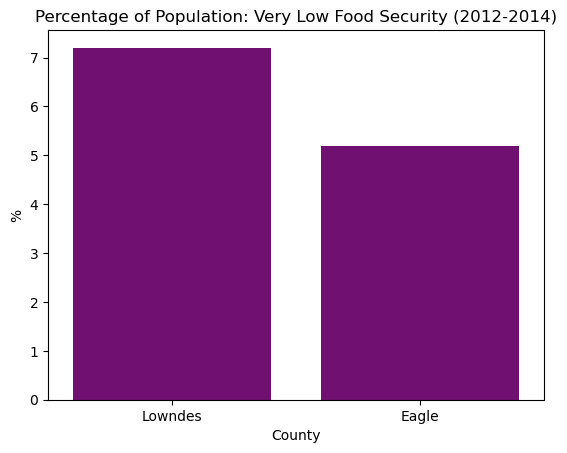

In [43]:
sns.barplot(data=case_insecurity_df, x='county', y='vlfoodsec_12_14', color = 'purple').set(
    title = 'Percentage of Population: Very Low Food Security (2012-2014)', xlabel = 'County', ylabel = '%');

##### Observations

Lowndes County had a higher prevalence of very low food security.

## V. Local

This dataset was not previously analyzed due to the sheer number of variables. I will now separate this dataset into smaller sets that will be more easily analyzed.

In [44]:
file_path = '../data/FoodEnvironmentAtlas.xls.LOCAL_CLEAN.csv'

local = pd.read_csv(file_path)

In [45]:
local.head() #shows top 5 rows of dataframe

fips state   county  dirsales_farms07  dirsales_farms12  \
0  1001.0    AL  Autauga              25.0              51.0   
1  1003.0    AL  Baldwin              80.0             103.0   
2  1005.0    AL  Barbour              18.0              13.0   
3  1007.0    AL     Bibb              12.0              13.0   
4  1009.0    AL   Blount              84.0              88.0   

   pch_dirsales_farms_07_12  pct_loclfarm07  pct_loclfarm12  pct_loclsale07  \
0                104.000000        6.024096       13.110540        0.596374   
1                 28.750000        7.023705       10.414560        0.712634   
2                -27.777778        2.889246        2.276708        0.015403   
3                  8.333333        5.687204        6.878307             NaN   
4                  4.761905        5.940594        7.091056        0.267717   

   pct_loclsale12  ...  csa12  pch_csa_07_12  agritrsm_ops07  agritrsm_ops12  \
0        1.554692  ...    3.0      50.000000             7.0            10.0   
1        0.478010  ...    7.0     -46.153846            18.0            16.0   
2        0.012457  ...    0.0    -100.000000            27.0            32.0   
3             NaN  ...    3.0      50.000000             5.0             6.0   
4        0.277792  ...    4.0     -42.857143            10.0             8.0   

   pch_agritrsm_ops_07_12  agritrsm_rct07  agritrsm_rct12  \
0               42.857143        228000.0        146000.0   
1              -11.111111        124000.0        204000.0   
2               18.518519        163000.0        304000.0   
3               20.000000             NaN         21000.0   
4              -20.000000        293000.0         30000.0   

   pch_agritrsm_rct_07_12  farm_to_school13  farm_to_school15  
0              -35.964912               NaN               0.0  
1               64.516129               0.0               1.0  
2               86.503067               1.0               0.0  
3                     NaN               0.0               0.0  
4              -89.761092               1.0               0.0  

[5 rows x 100 columns]

In [46]:
local.shape #shows layout of dataframe

(3143, 100)

In [47]:
local.columns #displays column names

Index(['fips', 'state', 'county', 'dirsales_farms07', 'dirsales_farms12',
       'pch_dirsales_farms_07_12', 'pct_loclfarm07', 'pct_loclfarm12',
       'pct_loclsale07', 'pct_loclsale12', 'dirsales07', 'dirsales12',
       'pch_dirsales_07_12', 'pc_dirsales07', 'pc_dirsales12',
       'pch_pc_dirsales_07_12', 'fmrkt13', 'fmrkt18', 'pch_fmrkt_13_18',
       'fmrktpth13', 'fmrktpth18', 'pch_fmrktpth_13_18', 'fmrkt_snap18',
       'pct_fmrkt_snap18', 'fmrkt_wic18', 'pct_fmrkt_wic18', 'fmrkt_wiccash18',
       'pct_fmrkt_wiccash18', 'fmrkt_sfmnp18', 'pct_fmrkt_sfmnp18',
       'fmrkt_credit18', 'pct_fmrkt_credit18', 'fmrkt_frveg18',
       'pct_fmrkt_frveg18', 'fmrkt_anmlprod18', 'pct_fmrkt_anmlprod18',
       'fmrkt_baked18', 'pct_fmrkt_baked18', 'fmrkt_otherfood18',
       'pct_fmrkt_otherfood18', 'veg_farms07', 'veg_farms12',
       'pch_veg_farms_07_12', 'veg_acres07', 'veg_acres12',
       'pch_veg_acres_07_12', 'veg_acrespth07', 'veg_acrespth12',
       'pch_veg_acrespth_07_12', 'fre

#### Distribution - Direct Sales Farms (2012)

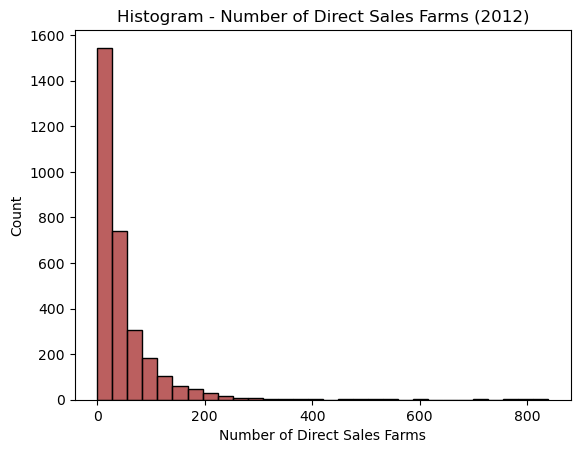

In [48]:
sns.histplot(data= local, x= 'dirsales_farms12', bins = 30, color = 'brown').set(
title= 'Histogram - Number of Direct Sales Farms (2012)', xlabel = 'Number of Direct Sales Farms');

While it appears it was common for counties to have relatively few direct sales farms, some had more, even exceeduing 800 in some counties.

### Correlations

First, I will add the Diabetes 2013 information to the dataframe.

In [49]:
local['pct_diabetes_adults13'] = health['pct_diabetes_adults13']

Now, I will create separate dataframes based on the variable names.

### 1.Sales

In [50]:
local_sales = local[['fips', 'state', 'county', 'dirsales_farms07', 'dirsales_farms12',
       'pch_dirsales_farms_07_12', 'pct_loclfarm07', 'pct_loclfarm12',
       'pct_loclsale07', 'pct_loclsale12', 'dirsales07', 'dirsales12',
       'pch_dirsales_07_12', 'pc_dirsales07', 'pc_dirsales12',
       'pch_pc_dirsales_07_12','pct_diabetes_adults13']]

Now, I will observe the correlations.

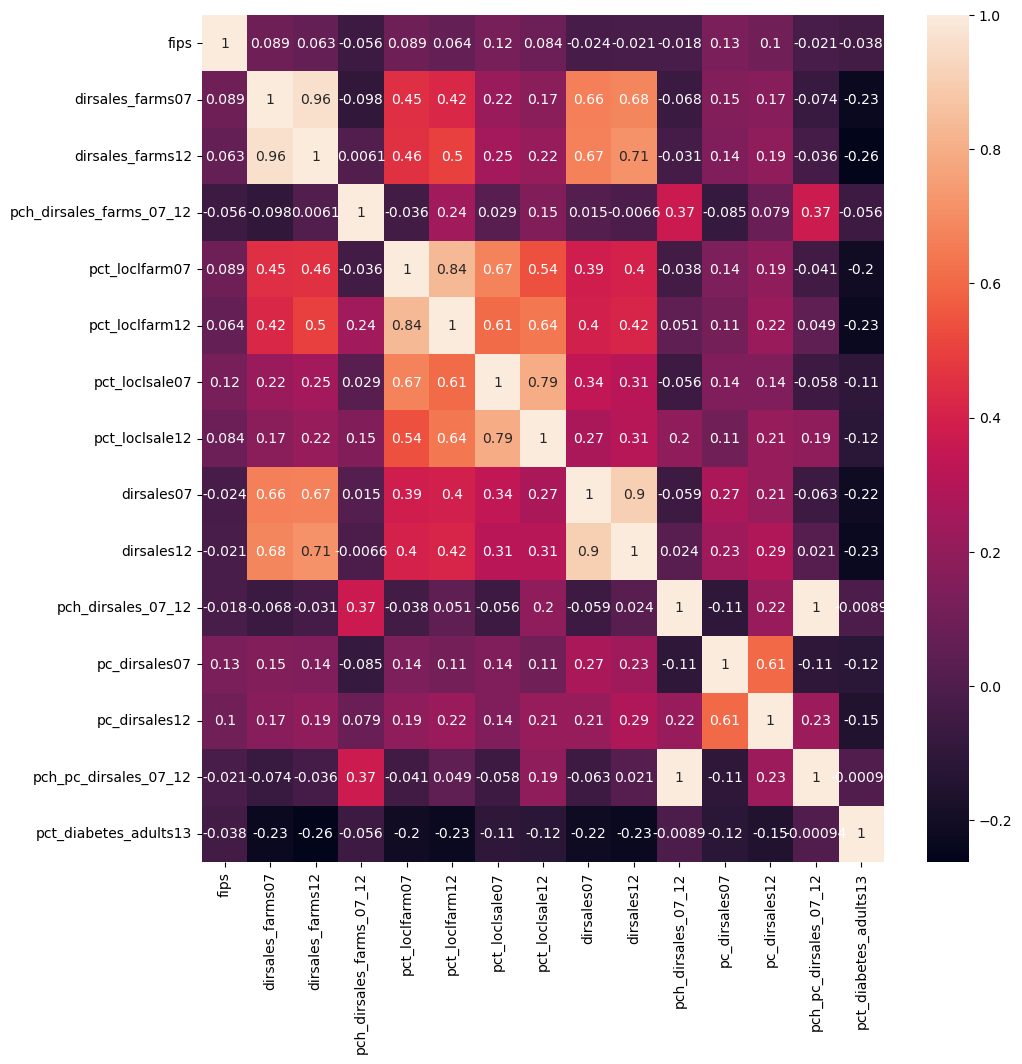

In [51]:
fig, ax = plt.subplots(figsize = (11,11))

sns.heatmap(local_sales.corr(), annot=True); #creates a heatmap with correlation numbers

There are some fair and negative correlations here. Some of the direct sales farms (numbers, percentages, per capita) variables correlate with diabetes prevalence with values of 0.2 - 0.26.  This suggests that local farms, and their direct sales lower the pervalence of diabetes. This is logical, as vegetables are low in calories and high in fiber. 

There may be other variables within the Local dataset that correlate with diabetes. I will create and observe the next subset.

### 2. Farmer's Markets - Payment

In [52]:
local_frmrkt_payment = local[['fips', 'state', 'county', 'fmrkt13', 'fmrkt18', 'pch_fmrkt_13_18',
       'fmrktpth13', 'fmrktpth18', 'pch_fmrktpth_13_18', 'fmrkt_snap18',
       'pct_fmrkt_snap18', 'fmrkt_wic18', 'pct_fmrkt_wic18', 'fmrkt_wiccash18',
       'pct_fmrkt_wiccash18', 'fmrkt_sfmnp18', 'pct_fmrkt_sfmnp18',
       'fmrkt_credit18', 'pct_fmrkt_credit18', 'pct_diabetes_adults13']]

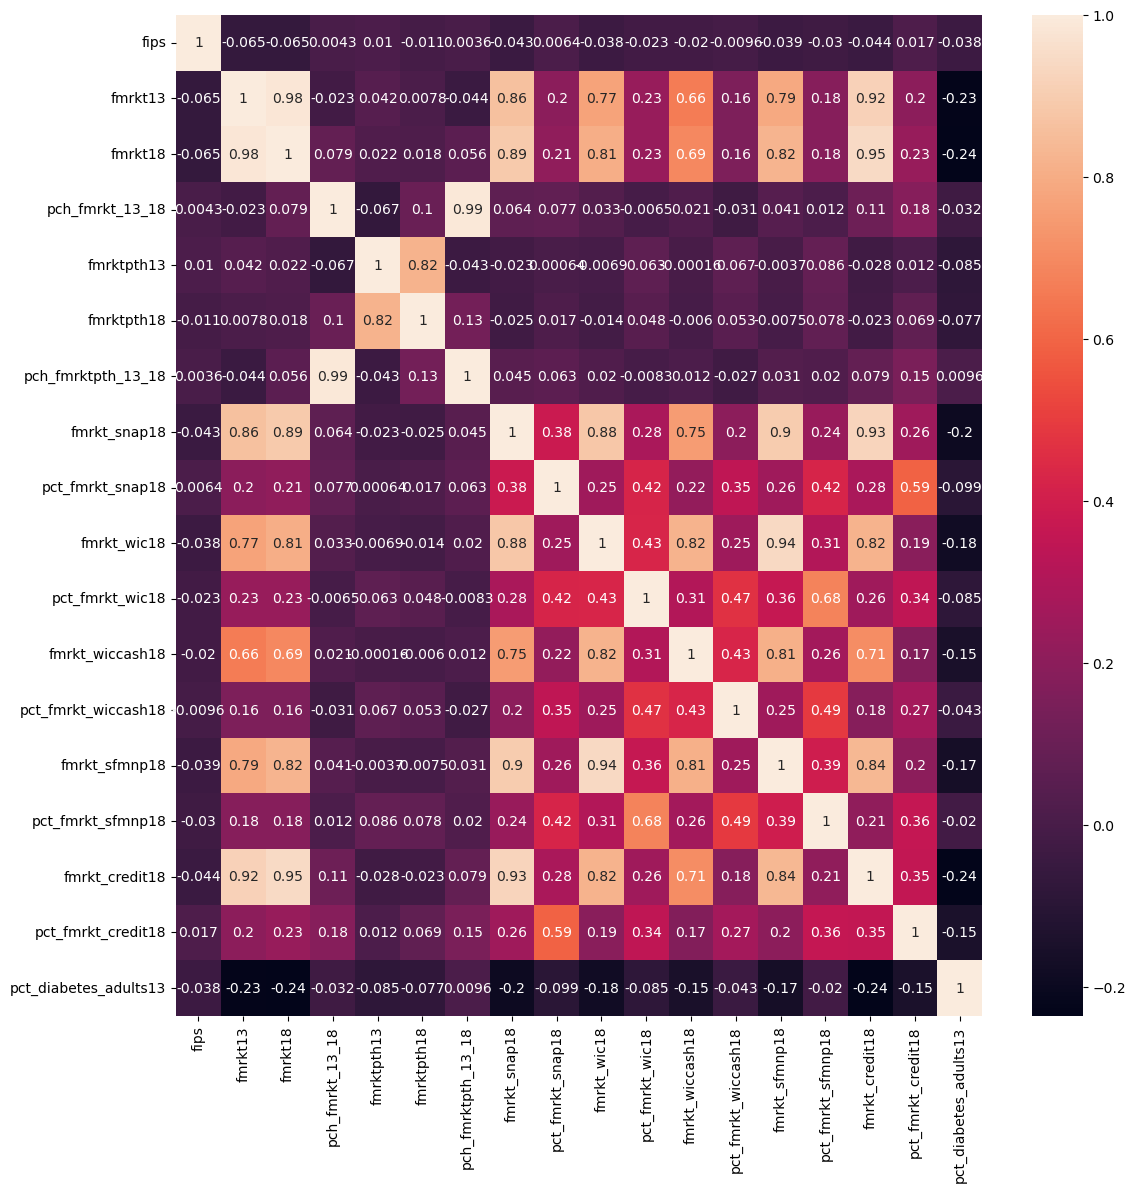

In [53]:
fig, ax = plt.subplots(figsize = (13,13))

sns.heatmap(local_frmrkt_payment.corr(), annot=True);

There are fair correlations with prevalence of diabetes here. The number of farmer's markets in 2013 has a corelation of -0.23. The number of farmer's markets that accept SNAP (2018) has a -0.2 correlation with diabetes.

I will observe the next subset.

### 3. Farmer's Markets - Foods

In [54]:
local_frmrkt_foods = local[['fips', 'state', 'county', 'fmrkt_frveg18',
       'pct_fmrkt_frveg18', 'fmrkt_anmlprod18', 'pct_fmrkt_anmlprod18',
       'fmrkt_baked18', 'pct_fmrkt_baked18', 'fmrkt_otherfood18',
       'pct_fmrkt_otherfood18', 'pct_diabetes_adults13']]

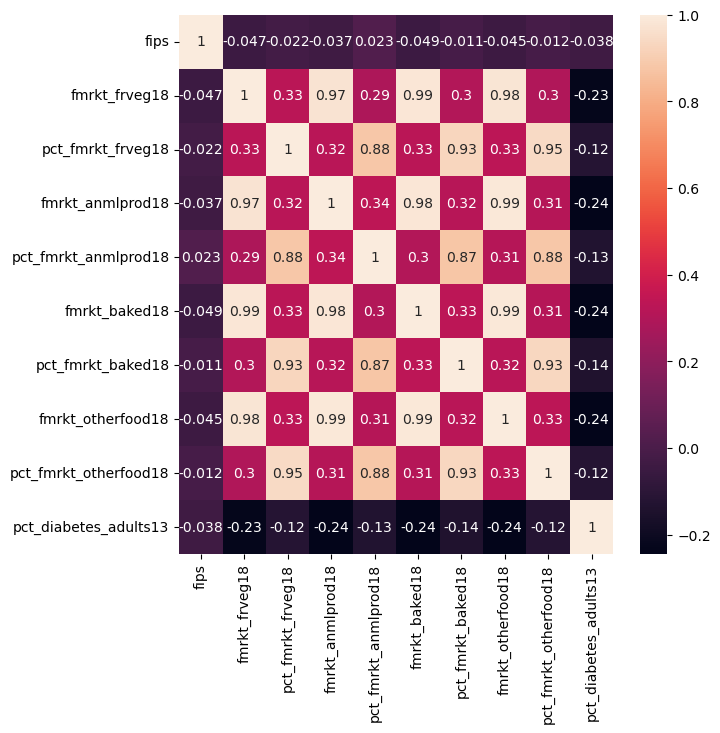

In [55]:
fig, ax = plt.subplots(figsize = (7,7))

sns.heatmap(local_frmrkt_foods.corr(), annot=True);

The number (not percent) of farmer's markets offering fruits and veggies, animal products, baked products, and other goods share a correlation with diabetes of -0.24.

I will observe the next subset.

### 4. Vegetable Acres/Farms

In [56]:
local_vegfarms = local[['fips', 'state', 'county', 'veg_farms07', 'veg_farms12',
       'pch_veg_farms_07_12', 'veg_acres07', 'veg_acres12',
       'pch_veg_acres_07_12', 'veg_acrespth07', 'veg_acrespth12',
       'pch_veg_acrespth_07_12', 'freshveg_farms07', 'freshveg_farms12',
       'pch_freshveg_farms_07_12', 'freshveg_acres07', 'freshveg_acres12',
       'pch_freshveg_acres_07_12', 'freshveg_acrespth07',
       'freshveg_acrespth12', 'pch_freshveg_acrespth_07_12', 'pct_diabetes_adults13']]

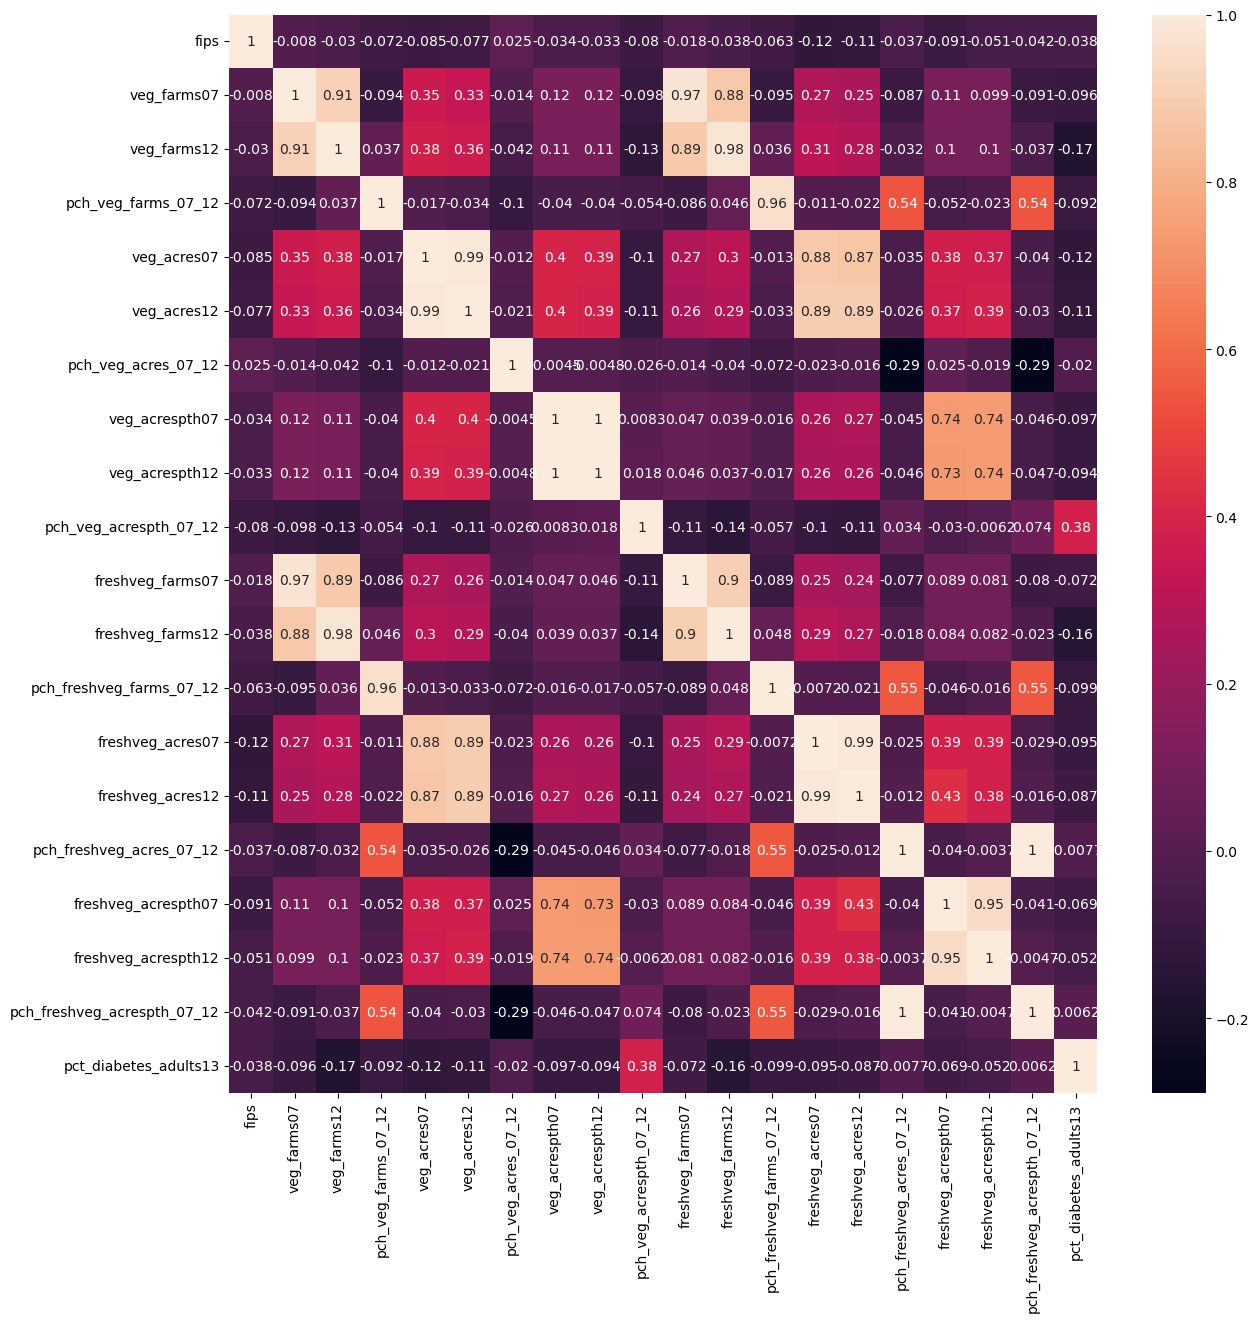

In [57]:
fig, ax = plt.subplots(figsize = (14,14))

sns.heatmap(local_vegfarms.corr(), annot=True);

The variable with strongest correlation with diabetes (0.38) is the percent change in vegetable acres from 2007 - 2012.

I will observe the next subset.

### 5. Orchards

In [58]:
local_orchards = local[['orchard_farms07',
       'orchard_farms12', 'pch_orchard_farms_07_12', 'orchard_acres07',
       'orchard_acres12', 'pch_orchard_acres_07_12', 'orchard_acrespth07',
       'orchard_acrespth12', 'pch_orchard_acrespth_07_12', 'pct_diabetes_adults13']] 

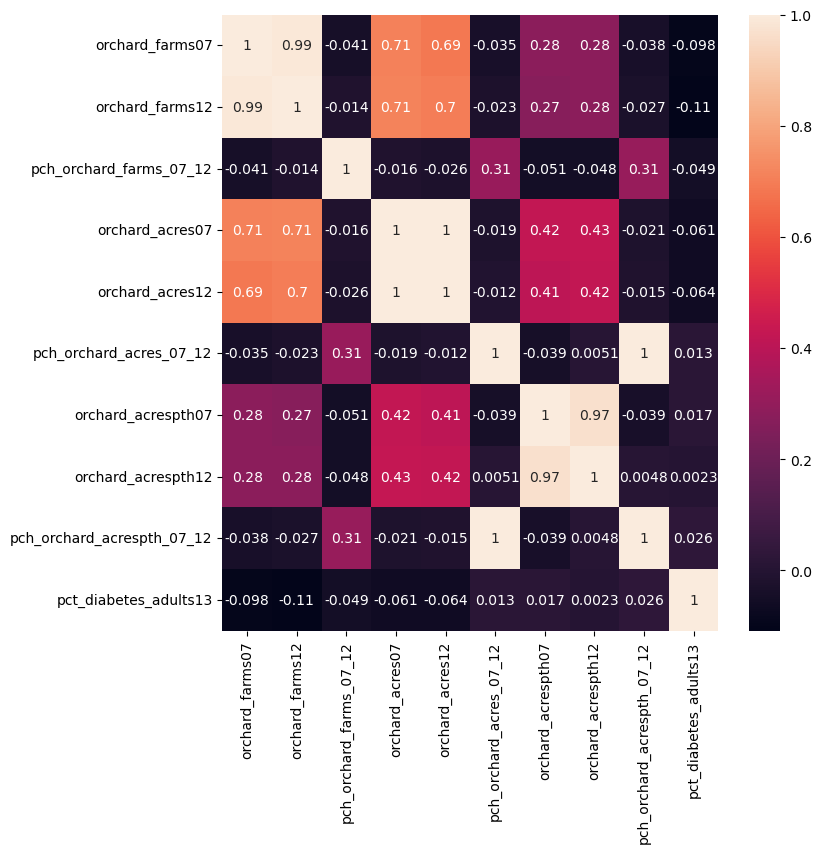

In [59]:
fig, ax = plt.subplots(figsize = (8,8))

sns.heatmap(local_orchards.corr(), annot=True);

The correlations with diabetes shown here are low, with the highest reaching -0.11 with the number of orchard farms.

I will observe the next subset.

### 6. Berry Farms

In [60]:
local_berries = local[['berry_farms07',
       'berry_farms12', 'pch_berry_farms_07_12', 'berry_acres07',
       'berry_acres12', 'pch_berry_acres_07_12', 'berry_acrespth07',
       'berry_acrespth12', 'pch_berry_acrespth_07_12', 'pct_diabetes_adults13']]

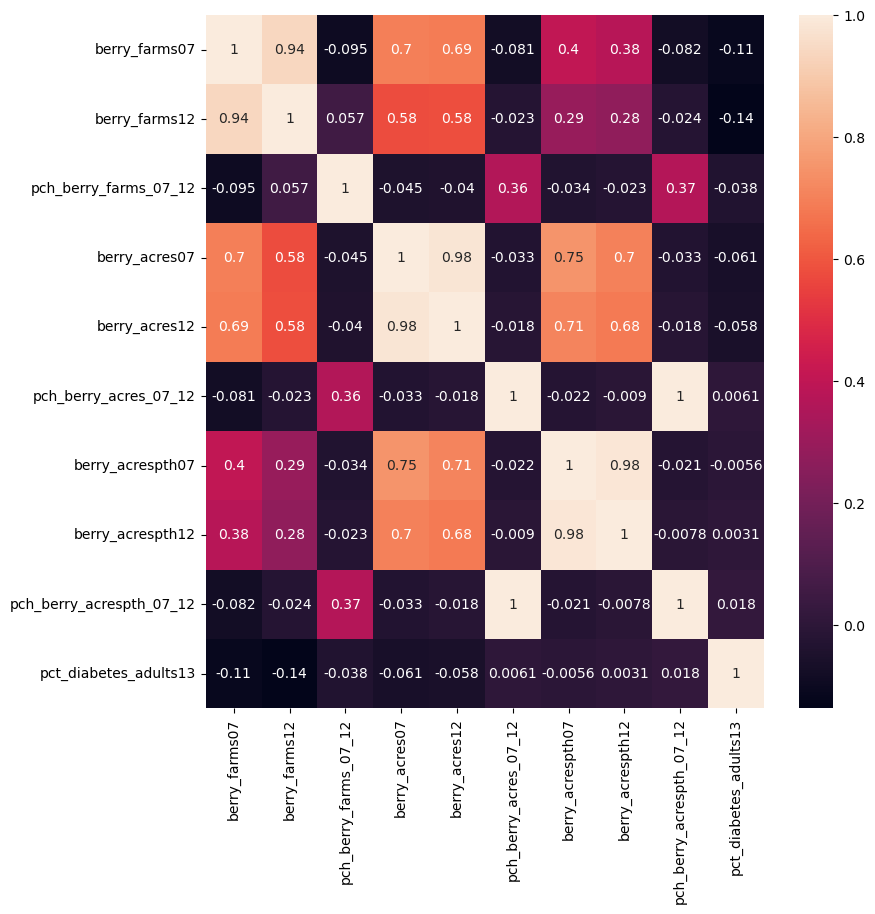

In [61]:
fig, ax = plt.subplots(figsize = (9,9))

sns.heatmap(local_berries.corr(), annot=True);

All of the correlations with prevalence of diabetes are weak.

I will observe the next subset.

### 7. Slaughterhouses/Greenhouses

In [62]:
local_houses = local[['slhouse07',
       'slhouse12', 'pch_slhouse_07_12', 'ghveg_farms07', 'ghveg_farms12',
       'pch_ghveg_farms_07_12', 'ghveg_sqft07', 'ghveg_sqft12',
       'pch_ghveg_sqft_07_12', 'ghveg_sqftpth07', 'ghveg_sqftpth12',
       'pch_ghveg_sqftpth_07_12', 'pct_diabetes_adults13']]

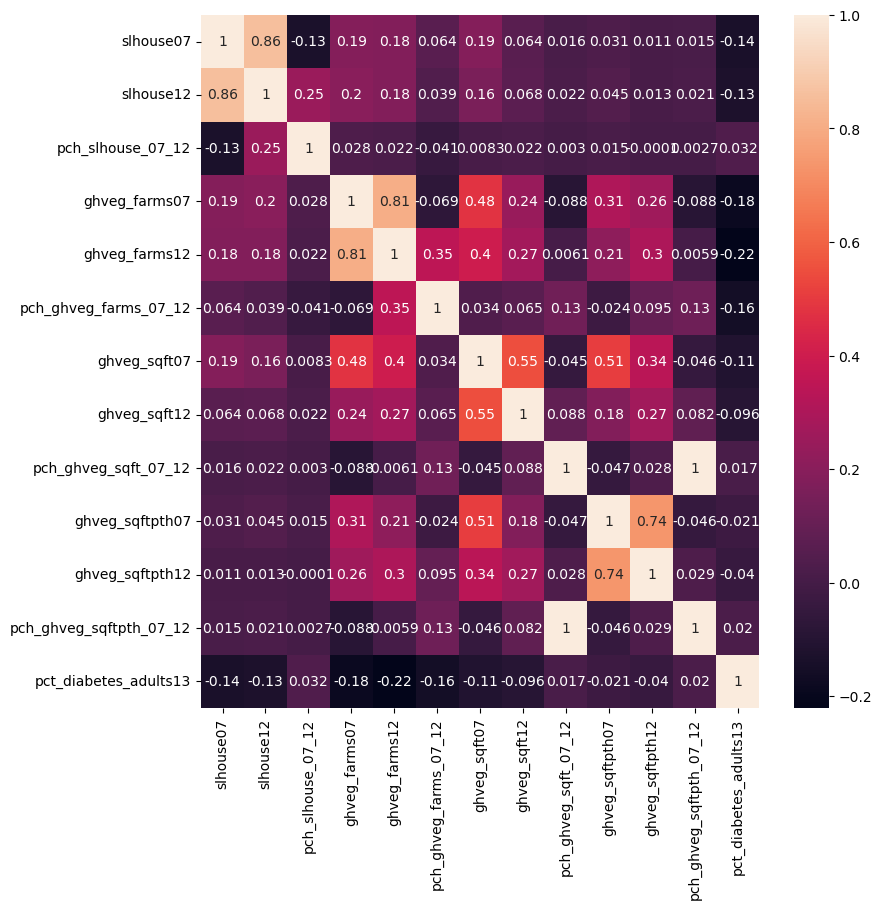

In [63]:
fig, ax = plt.subplots(figsize = (9,9))

sns.heatmap(local_houses.corr(), annot=True);

The correlations between prevalence of diabetes are weaker with the slaughterhouse variables (-0.03 - -0.14) than they are with the vegetable/herb farm/greenhouse variables (-0.10 - -0.22.)

I will observe the last subset.

### 8. Other Food Outlets

In [64]:
local_other = local[['foodhub18', 'csa07', 'csa12',
       'pch_csa_07_12', 'agritrsm_ops07', 'agritrsm_ops12',
       'pch_agritrsm_ops_07_12', 'agritrsm_rct07', 'agritrsm_rct12',
       'pch_agritrsm_rct_07_12', 'farm_to_school13', 'farm_to_school15', 'pct_diabetes_adults13']]

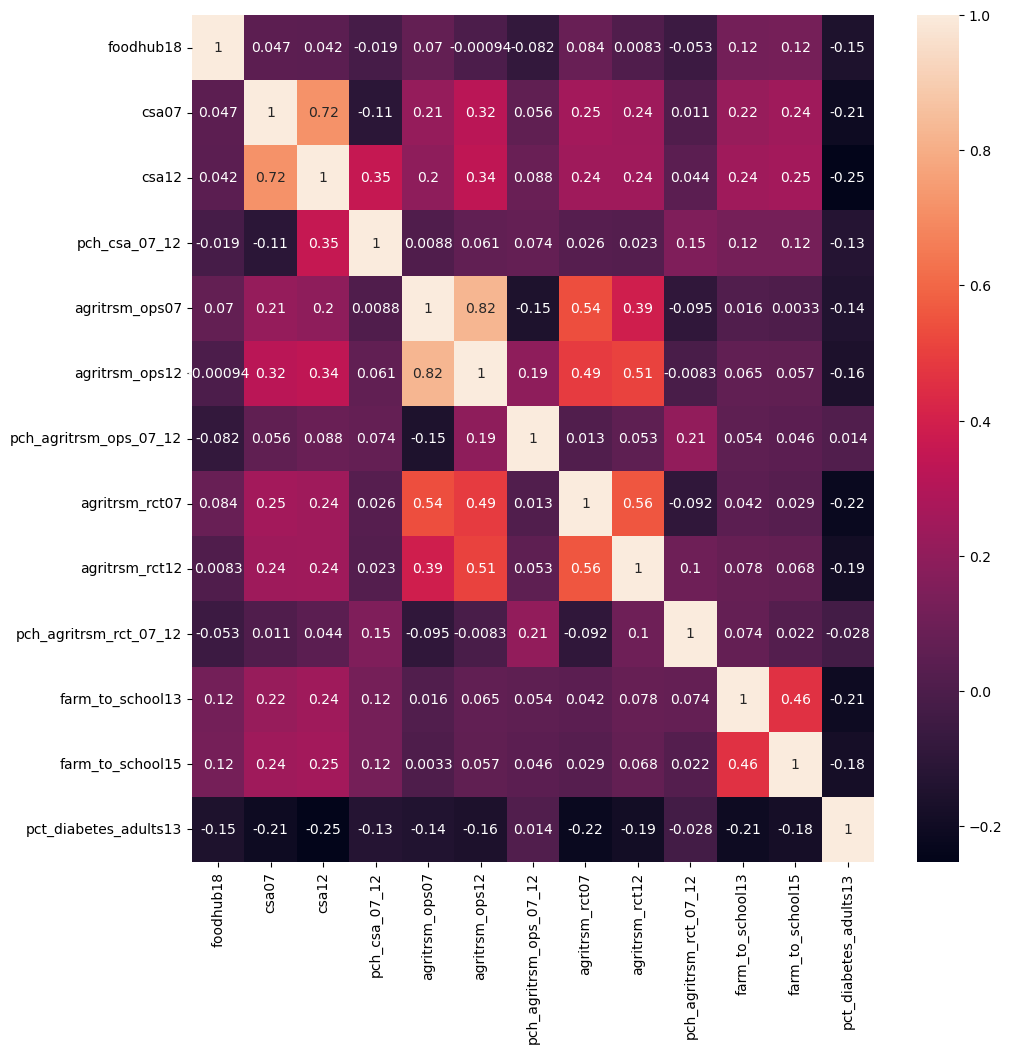

In [65]:
fig, ax = plt.subplots(figsize = (11,11))

sns.heatmap(local_other.corr(), annot=True);

Some of these variables correlate with the prevalence of diabetes with a value of more than -0.2, including csas, agritourism (2007), and farm to school programs (2013.)

### Summary

I created 8 subsets from the 100-variable Local dataset. Generally, the Local dataset variables shared a negative correlation with prevalence of diabetes, meaning the higher the number of acres/farms of farmland, e.t.c., the less prevalent diabetes was.

Of the 8 subcategories, all contained at least 1 variable that correlates with prevalence of diabetes of at least (-)0.2 except for the Berry Farms and Orchards subset. I will most likely not use these to subsets in modeling.

Surprisingly, the strongest correlation with prevalence of diabetes was the percent change of vegetable farm acres between 2007 and 2012 (0.38.) At this time, I am uncertain of what the explanation will be.

More may be ascertained as the analyses continue. Next, I will observe the Restaurants dataset.

##### Case Study

In [66]:
#creates a subset of Eagle County, CO and Lowndes County, GA

case_local = local.loc[(local['county'] == 'Eagle') | ((local['county'] == 'Lowndes') 
                                                                      & (local['state'] == 'AL'))]

case_local #displays subset

fips state   county  dirsales_farms07  dirsales_farms12  \
42   1085.0    AL  Lowndes              19.0              16.0   
263  8037.0    CO    Eagle              12.0              22.0   

     pch_dirsales_farms_07_12  pct_loclfarm07  pct_loclfarm12  pct_loclsale07  \
42                 -15.789474        4.691358        3.628118        0.027694   
263                 83.333333        7.894737       13.333333        1.033912   

     pct_loclsale12  ...  pch_csa_07_12  agritrsm_ops07  agritrsm_ops12  \
42         0.036690  ...         -100.0             9.0            18.0   
263        1.423532  ...          200.0            10.0            12.0   

     pch_agritrsm_ops_07_12  agritrsm_rct07  agritrsm_rct12  \
42                    100.0        106000.0        205000.0   
263                    20.0             NaN        112000.0   

     pch_agritrsm_rct_07_12  farm_to_school13  farm_to_school15  \
42                93.396226               1.0               1.0   
263                     NaN               0.0               0.0   

     pct_diabetes_adults13  
42                    23.5  
263                    3.3  

[2 rows x 101 columns]

In [67]:
case_local_df = pd.DataFrame(case_local)

*Number of Direct Sales Farms*

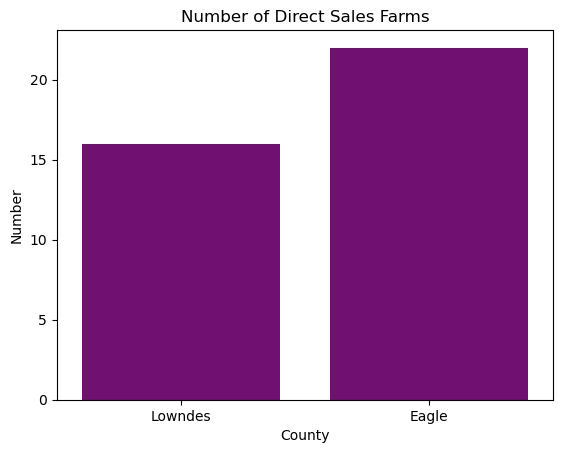

In [68]:
sns.barplot(data=case_local_df, x= 'county', y='dirsales_farms12', color = 'purple').set(
    title = 'Number of Direct Sales Farms', xlabel = 'County', ylabel = 'Number');

##### Observations

Lowndes County has a lower number of direct sales farms.

## VI. Restaurants

EDA completed in the previous notebook suggests that higher per capita expenditure in fast food restaurants may be predictive of higher prevalence of diabetes. This correlation and others will be shown below.

In [69]:
file_path = '../data/FoodEnvironmentAtlas.xls.RESTAURANTS_CLEAN.csv'

restaurants = pd.read_csv(file_path)

In [70]:
restaurants.head()

fips state   county  ffr11  ffr16  ffrpth11  ffrpth16  fsr11  fsr16  \
0  1001    AL  Autauga     34     44  0.615953  0.795977     32     31   
1  1003    AL  Baldwin    121    156  0.648675  0.751775    216    236   
2  1005    AL  Barbour     19     23  0.694673  0.892372     17     14   
3  1007    AL     Bibb      6      7  0.263794  0.309283      5      7   
4  1009    AL   Blount     20     23  0.347451  0.399569     15     12   

   fsrpth11  fsrpth16  pc_ffrsales07  pc_ffrsales12  pc_fsrsales07  \
0  0.579721  0.560802     649.511367      674.80272     484.381507   
1  1.157966  1.137300     649.511367      674.80272     484.381507   
2  0.621549  0.543183     649.511367      674.80272     484.381507   
3  0.219829  0.309283     649.511367      674.80272     484.381507   
4  0.260589  0.208471     649.511367      674.80272     484.381507   

   pc_fsrsales12  
0     512.280987  
1     512.280987  
2     512.280987  
3     512.280987  
4     512.280987

In [71]:
restaurants.shape

(3143, 15)

In [72]:
restaurants.columns

Index(['fips', 'state', 'county', 'ffr11', 'ffr16', 'ffrpth11', 'ffrpth16',
       'fsr11', 'fsr16', 'fsrpth11', 'fsrpth16', 'pc_ffrsales07',
       'pc_ffrsales12', 'pc_fsrsales07', 'pc_fsrsales12'],
      dtype='object')

#### Distribution - Per Capita Full Sales Restaurant Sales (2012)

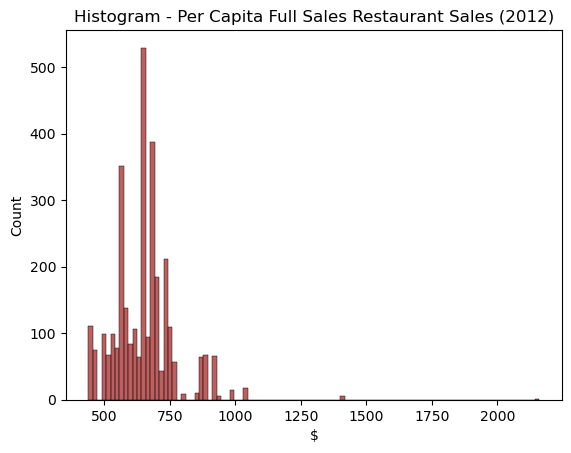

In [73]:
sns.histplot(data=restaurants, x='pc_fsrsales12', color = 'brown').set(
    title = 'Histogram - Per Capita Full Sales Restaurant Sales (2012)', xlabel = '$');

Most of the values are between 0 and 750, with some between 750 and approximately 1100, and a couple of outliers beyond that.

#### Correlations

In order to observe correlations, I will add in the prevalence of diabetes column from the Health dataset.

In [74]:
restaurants['pct_diabetes_adults13'] = health['pct_diabetes_adults13']

restaurants.columns

Index(['fips', 'state', 'county', 'ffr11', 'ffr16', 'ffrpth11', 'ffrpth16',
       'fsr11', 'fsr16', 'fsrpth11', 'fsrpth16', 'pc_ffrsales07',
       'pc_ffrsales12', 'pc_fsrsales07', 'pc_fsrsales12',
       'pct_diabetes_adults13'],
      dtype='object')

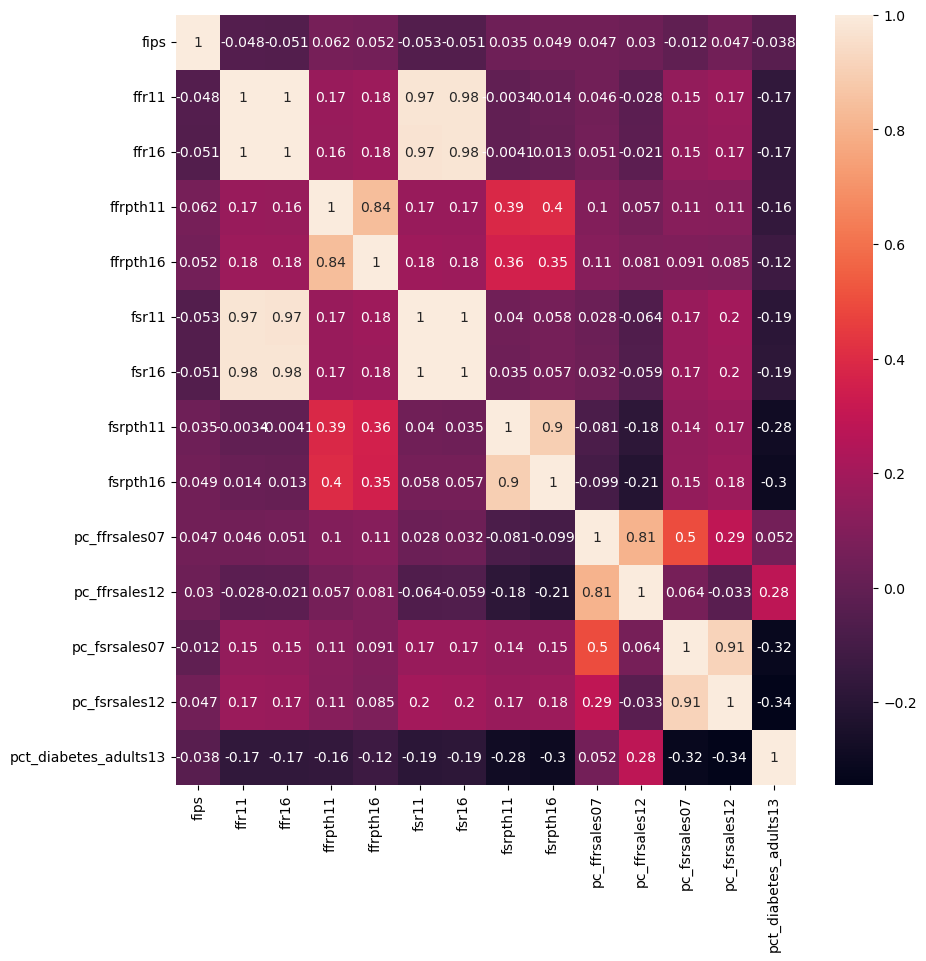

In [75]:
fig, ax = plt.subplots(figsize = (10,10))

sns.heatmap(restaurants.corr(), annot= True);

The strongest correlations with prevalence of diabetes are the per capita sales variables. 

The per capita sales at full service restaurants (2012) correlates with prevalence of diabetes with a value of -0.34, meaning the higher the spending at full service restaurants, the lower the prevalence of diabetes. 

Additionally, the per capita sales at fast food restaurants (2012) correlates with prevalence of diabetes with a value of 0.28, meaning the higher the spending at fast food restaurants, the higher the prevalence of diabetes.

The percent change of fast food restaurants also has a negative correlation with prevalence of diabetes of ~ -0.3.

It makes sense that those who spend more money at full service restaurants eat healthier food items and thus have a lower prevalence of diabetes, and those who spend more at fast food restaurant eat unhealthier foods, and thus have a higher prevalence of diabetes.

I will move on now to analyze the Socioeconomic dataset.

##### Case Study

In [76]:
#creates a subset of Eagle County, CO and Lowndes County, GA

case_restaurants = restaurants.loc[(restaurants['county'] == 'Eagle') | ((restaurants['county'] == 'Lowndes') 
                                                                      & (restaurants['state'] == 'AL'))]

case_restaurants #displays subset

fips state   county  ffr11  ffr16  ffrpth11  ffrpth16  fsr11  fsr16  \
42   1085    AL  Lowndes      1      1  0.089847  0.097647      2      2   
263  8037    CO    Eagle     43     48  0.828644  0.882937    127    128   

     fsrpth11  fsrpth16  pc_ffrsales07  pc_ffrsales12  pc_fsrsales07  \
42   0.179695  0.195293     649.511367     674.802720     484.381507   
263  2.447391  2.354499     747.095794     617.951624     900.316210   

     pc_fsrsales12  pct_diabetes_adults13  
42      512.280987                   23.5  
263     877.923282                    3.3

In [77]:
restaurants.dtypes

fips                       int64
state                     object
county                    object
ffr11                      int64
ffr16                      int64
ffrpth11                 float64
ffrpth16                 float64
fsr11                      int64
fsr16                      int64
fsrpth11                 float64
fsrpth16                 float64
pc_ffrsales07            float64
pc_ffrsales12            float64
pc_fsrsales07            float64
pc_fsrsales12            float64
pct_diabetes_adults13    float64
dtype: object

In [78]:
case_restaurants_df = pd.DataFrame(case_restaurants)

*Per Capita Spending : Full Service Restaurants (2012)*

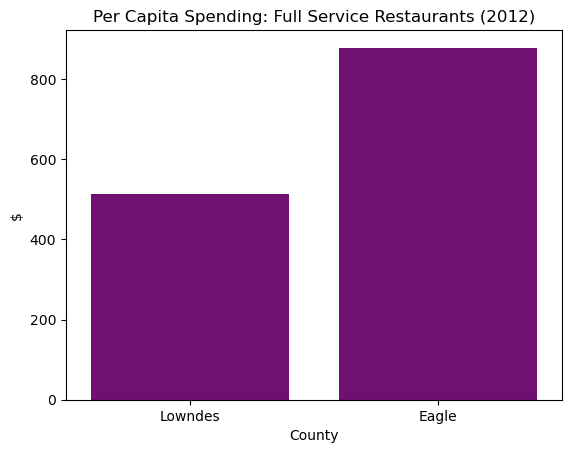

In [79]:
sns.barplot(data=case_restaurants_df, x= 'county', y='pc_fsrsales12', color = 'purple').set(
    title = 'Per Capita Spending: Full Service Restaurants (2012)', xlabel = 'County', ylabel = '$');

Lowndes County has lower spending per capita on Full Service Restaurants.

## VII. Socioeconomic

Earlier analysis suggests that persistent poverty may correlate positively with prevalence of diabetes, while metropolitan counties may have lower prevalence of diabetes.

Correlations will be explored below.

In [80]:
file_path = '../data/FoodEnvironmentAtlas.xls.SOCIOECONOMIC_CLEAN.csv'

socioeconomic = pd.read_csv(file_path)

In [81]:
socioeconomic.head()

fips state   county  pct_65older10  pct_18younger10  medhhinc15  povrate15  \
0  1001    AL  Autauga      11.995382        26.777959     56580.0       12.7   
1  1003    AL  Baldwin      16.771185        22.987408     52387.0       12.9   
2  1005    AL  Barbour      14.236807        21.906982     31433.0       32.0   
3  1007    AL     Bibb      12.681650        22.696923     40767.0       22.2   
4  1009    AL   Blount      14.722096        24.608353     50487.0       14.7   

   perpov10  childpovrate15  perchldpov10  metro13  poploss10  
0         0            18.8             0        1        0.0  
1         0            19.6             0        1        0.0  
2         1            45.2             1        0        0.0  
3         0            29.3             1        1        0.0  
4         0            22.2             0        1        0.0

In [82]:
socioeconomic.shape

(3143, 12)

In [83]:
socioeconomic.columns

Index(['fips', 'state', 'county', 'pct_65older10', 'pct_18younger10',
       'medhhinc15', 'povrate15', 'perpov10', 'childpovrate15', 'perchldpov10',
       'metro13', 'poploss10'],
      dtype='object')

#### Distribution - Pervasive Child Poverty (2010)

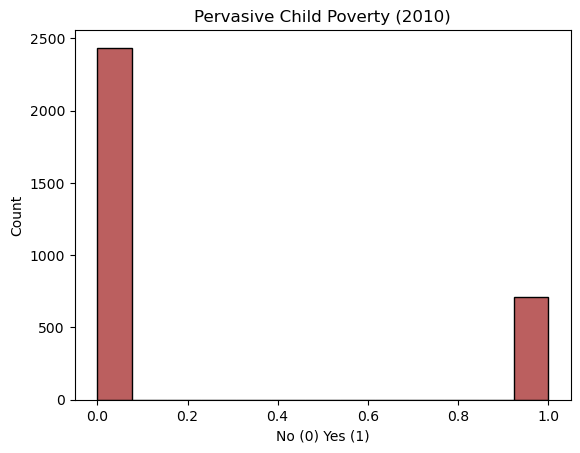

In [84]:
sns.histplot(data = socioeconomic, x='perchldpov10', color = 'brown').set(title = 'Pervasive Child Poverty (2010)',
                                                                         xlabel = 'No (0) Yes (1)');

Most of the counties (as assessed at a state level) do not experience pervasive child poverty.

#### Correlations

First, I will add the prevalence of diabetes column into this dataset.

In [85]:
socioeconomic['pct_diabetes_adults13'] = health['pct_diabetes_adults13']

socioeconomic.columns

Index(['fips', 'state', 'county', 'pct_65older10', 'pct_18younger10',
       'medhhinc15', 'povrate15', 'perpov10', 'childpovrate15', 'perchldpov10',
       'metro13', 'poploss10', 'pct_diabetes_adults13'],
      dtype='object')

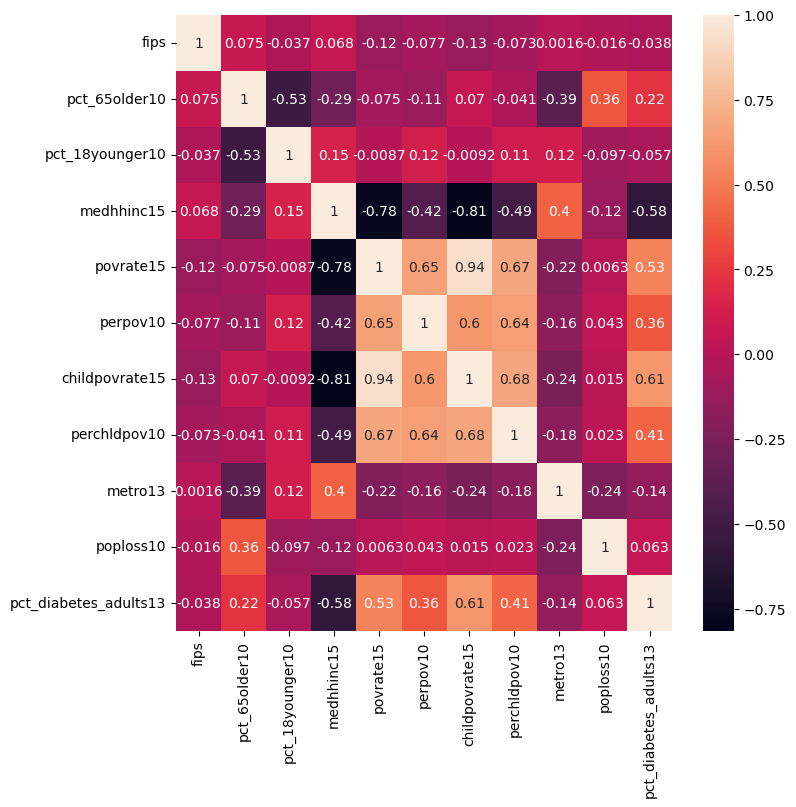

In [86]:
fig, ax = plt.subplots(figsize = (8,8))

sns.heatmap(socioeconomic.corr(), annot=True);

Other than prevalence of obesity which was observed in the Health dataset, the current dataset contains the variables most strongly correlated with prevalence of diabetes.

Median household income (2015) has a correlation of -0.58 with prevalence of diabetes, indicating that the higher the median income of a county, the lower the prevalence of diabetes.

Poverty rate (2015) has a correlation of 0.53 with prevalence of diabetes, indicating that the higher the poverty rate of a county, the higher the prevalence of diabetes.

The child poverty rate (2015) has a correlation of 0.61, indicating the higher the child poverty rate, the higher the prevalence of diabetes.

This suggests that alleviating poverty and/or its impact on the diet could significantly lower the prevalence of diabetes.

I will move on to analyze the Stores dataset.

##### Case Study

In [87]:
#creates a subset of Eagle County, CO and Lowndes County, GA

case_socioeconomic = socioeconomic.loc[(socioeconomic['county'] == 'Eagle') | ((socioeconomic['county'] == 'Lowndes') 
                                                                      & (socioeconomic['state'] == 'AL'))]

case_socioeconomic #displays subset

fips state   county  pct_65older10  pct_18younger10  medhhinc15  \
42   1085    AL  Lowndes      14.647314        24.179131     31117.0   
263  8037    CO    Eagle       5.628676        24.522482     75191.0   

     povrate15  perpov10  childpovrate15  perchldpov10  metro13  poploss10  \
42        35.2         1            46.7             1        1        0.0   
263        7.6         0            10.6             0        0        0.0   

     pct_diabetes_adults13  
42                    23.5  
263                    3.3

In [88]:
case_socioeconomic_df = pd.DataFrame(case_socioeconomic)

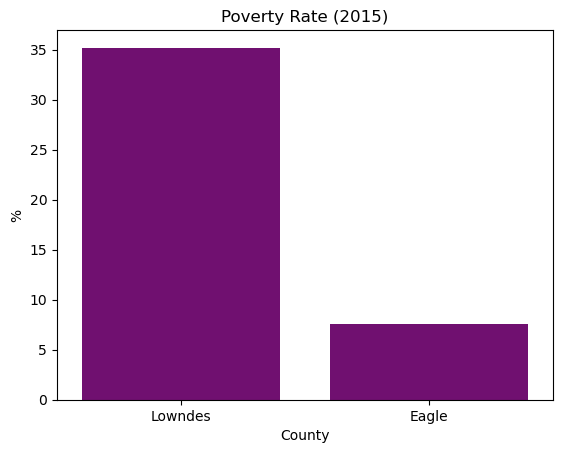

In [89]:
sns.barplot(data = case_socioeconomic_df, x= 'county', y='povrate15', color = 'purple').set(
    title = 'Poverty Rate (2015)', xlabel = 'County', ylabel = '%');

Lowndes County's 2015 poverty rate is approximately 35%, while Eagle County's is less than 10%. 

## VIII. Stores

This dataset contains 39 variables related to types of stores present within a county. It was not analyzed previously due to sheer number of columns. I will create subsets of the data, and look for correlations with prevalence of diabetes.

In [90]:
file_path = '../data/FoodEnvironmentAtlas.xls.STORES_CLEAN.csv'

stores = pd.read_csv(file_path)

In [91]:
stores.head()

fips state   county  groc11  groc16  pch_groc_11_16  grocpth11  grocpth16  \
0  1001    AL  Autauga       5       3      -40.000000   0.090581   0.054271   
1  1003    AL  Baldwin      27      29        7.407407   0.144746   0.139753   
2  1005    AL  Barbour       6       4      -33.333333   0.219370   0.155195   
3  1007    AL     Bibb       6       5      -16.666667   0.263794   0.220916   
4  1009    AL   Blount       7       5      -28.571429   0.121608   0.086863   

   pch_grocpth_11_16  superc11  ...  pch_snaps_12_17  snapspth12  snapspth17  \
0         -40.085748         1  ...        19.376392    0.674004    0.804747   
1          -3.449328         6  ...        36.927711    0.725055    0.890836   
2         -29.254287         0  ...         3.349282    1.280590    1.424614   
3         -16.254289         1  ...        11.794872    0.719122    0.801423   
4         -28.571429         1  ...         5.701754    0.657144    0.692374   

   pch_snapspth_12_17  wics11  wics16  pch_wics_11_16  wicspth11  wicspth16  \
0           19.397900     5.0     5.0        0.000000   0.090567   0.090511   
1           22.864524    26.0    28.0        7.692307   0.139380   0.134802   
2           11.246689     7.0     6.0      -14.285714   0.255942   0.232387   
3           11.444711     6.0     5.0      -16.666666   0.263771   0.221474   
4            5.361034     8.0     8.0        0.000000   0.139000   0.139089   

   pch_wicspth_11_16  
0          -0.061543  
1          -3.284727  
2          -9.203081  
3         -16.035471  
4           0.064332  

[5 rows x 39 columns]

In [92]:
stores.shape

(3143, 39)

In [93]:
stores['pct_diabetes_adults13'] = health['pct_diabetes_adults13'] #adds the diabetes prevalence into the dataframe

stores.columns

Index(['fips', 'state', 'county', 'groc11', 'groc16', 'pch_groc_11_16',
       'grocpth11', 'grocpth16', 'pch_grocpth_11_16', 'superc11', 'superc16',
       'pch_superc_11_16', 'supercpth11', 'supercpth16', 'pch_supercpth_11_16',
       'convs11', 'convs16', 'pch_convs_11_16', 'convspth11', 'convspth16',
       'pch_convspth_11_16', 'specs11', 'specs16', 'pch_specs_11_16',
       'specspth11', 'specspth16', 'pch_specspth_11_16', 'snaps12', 'snaps17',
       'pch_snaps_12_17', 'snapspth12', 'snapspth17', 'pch_snapspth_12_17',
       'wics11', 'wics16', 'pch_wics_11_16', 'wicspth11', 'wicspth16',
       'pch_wicspth_11_16', 'pct_diabetes_adults13'],
      dtype='object')

### Distribution - Number of Stores Accepting SNAP per 1000 Population

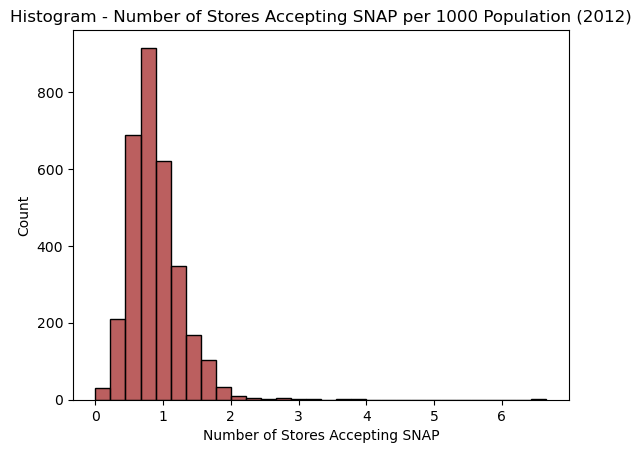

In [94]:
sns.histplot(data= stores, x= 'snapspth12', bins = 30, color = 'brown').set(
title= 'Histogram - Number of Stores Accepting SNAP per 1000 Population (2012)', 
    xlabel = 'Number of Stores Accepting SNAP');

It appears that 0-2 stores per 1000 population might be considered the norm, though some counties have more, up to between 6 and 7.

### Correlations

### 1. Grocery/Supercenter Stores

In [95]:
stores_grocery_super = stores[['fips', 'state', 'county', 'groc11', 'groc16', 'pch_groc_11_16',
       'grocpth11', 'grocpth16', 'pch_grocpth_11_16', 'superc11', 'superc16',
       'pch_superc_11_16', 'supercpth11', 'supercpth16', 'pch_supercpth_11_16', 'pct_diabetes_adults13']]

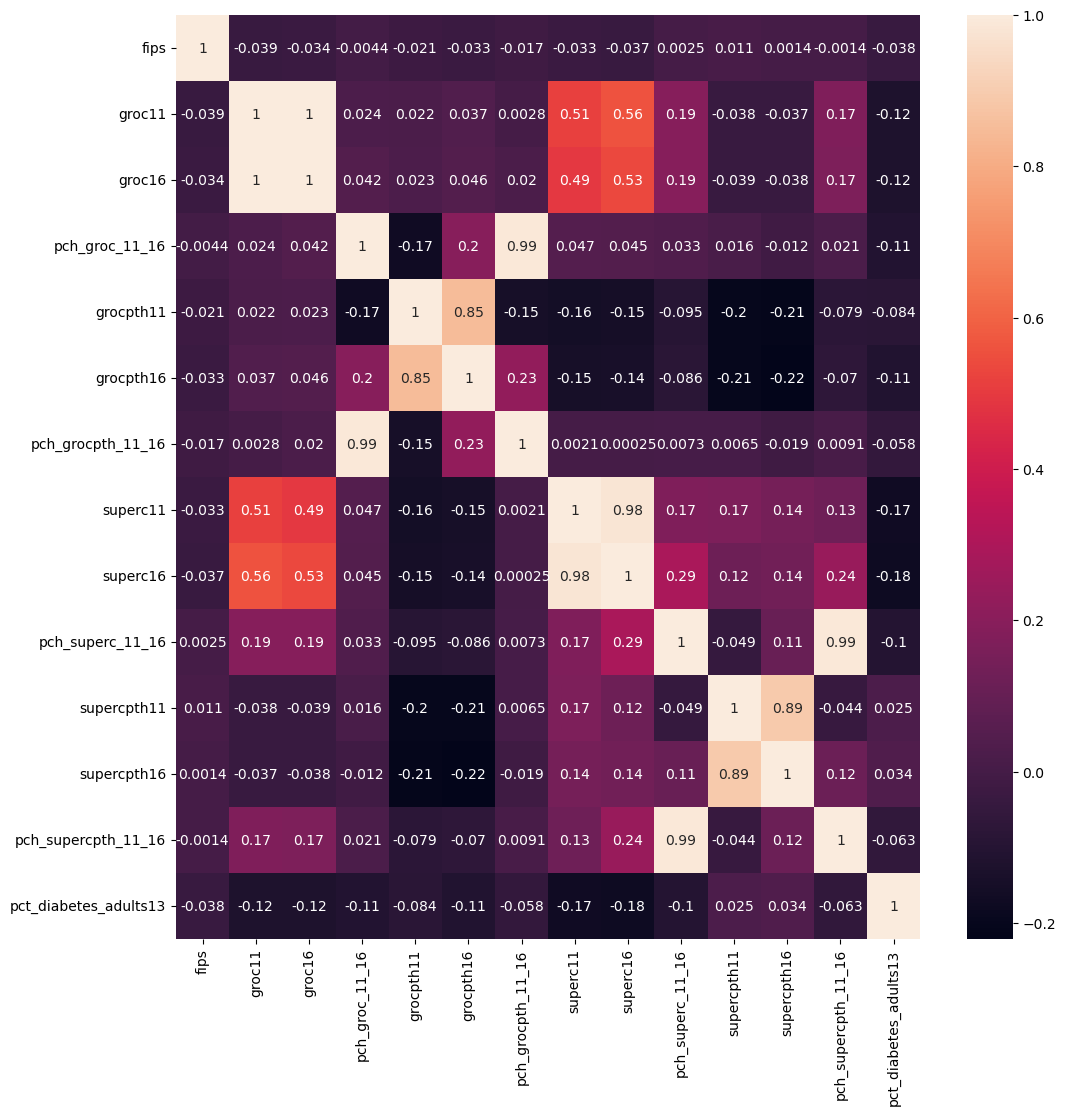

In [96]:
fig, ax = plt.subplots(figsize = (12,12))

sns.heatmap(stores_grocery_super.corr(), annot=True);

All of the correlations with prevalence of diabetes are weak.

I will observe the next subset.

### 2. Convenience & Specialized Food Stores

In [97]:
stores_conv_spec = stores[['fips', 'state', 'county', 'convs11', 'convs16', 'pch_convs_11_16', 'convspth11', 'convspth16',
       'pch_convspth_11_16', 'specs11', 'specs16', 'pch_specs_11_16',
       'specspth11', 'specspth16', 'pch_specspth_11_16', 'pct_diabetes_adults13']]

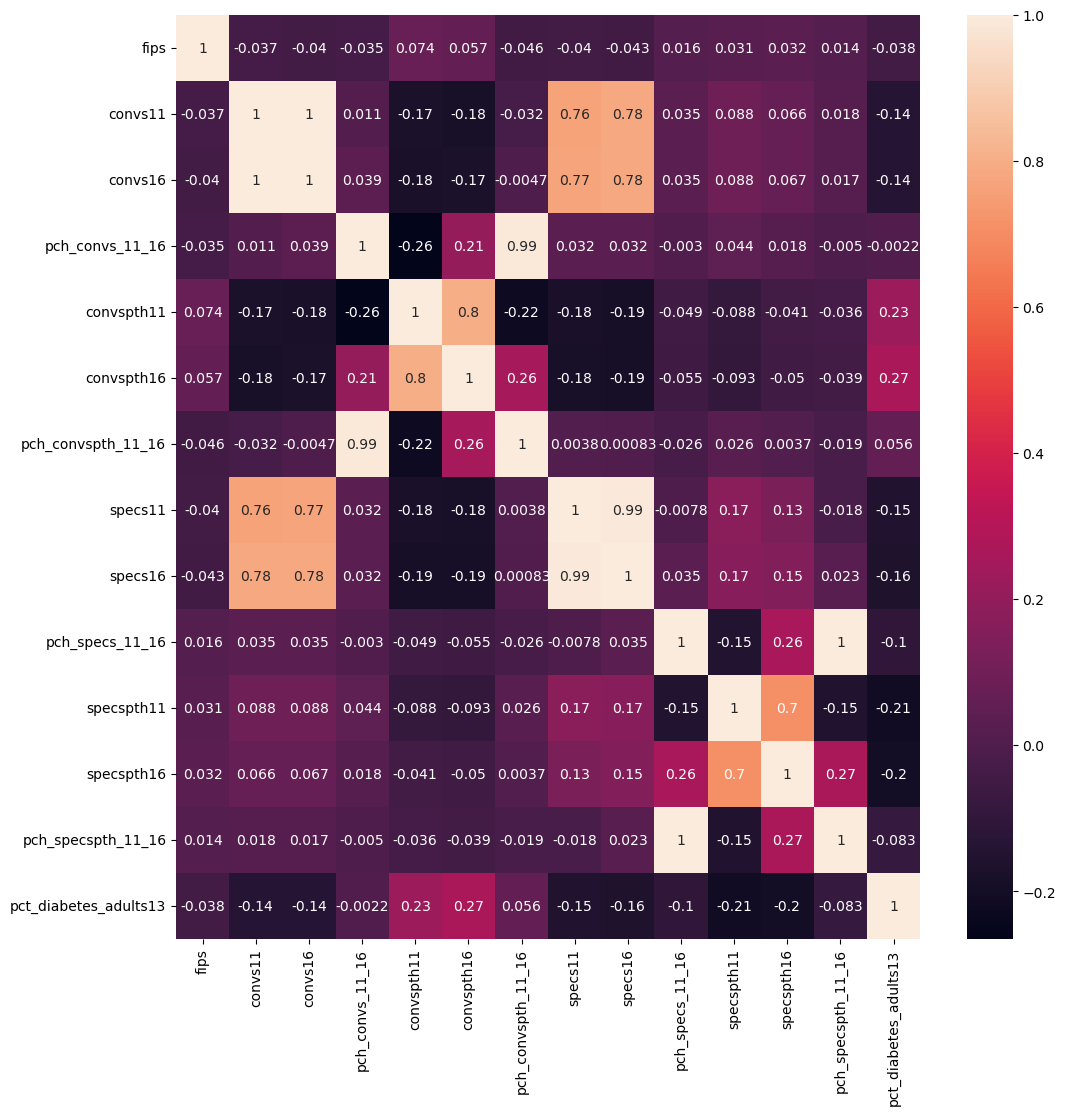

In [98]:
fig, ax = plt.subplots(figsize = (12,12))

sns.heatmap(stores_conv_spec.corr(), annot=True);

The number of convenience stores per thousand correlate with diabetes prevalence with fair values of 0.23 and 0.27 respectively. Meanwhile, the number of specialized stores per thousand correlate with diabetes prevalence with fair values of -0.21 and -0.2 respectively.

This makes sense, as convenience stores tend to mainly carry snack foods such as chips and soda. A specialized food store might carry healthier options that be less likely to trigger diabetes.

I will observe the next subset.

### 3. SNAP and WIC authorized stores

In [99]:
stores_snap_wic = stores[['fips', 'state', 'county', 'snaps12', 'snaps17',
       'pch_snaps_12_17', 'snapspth12', 'snapspth17', 'pch_snapspth_12_17',
       'wics11', 'wics16', 'pch_wics_11_16', 'wicspth11', 'wicspth16',
       'pch_wicspth_11_16', 'pct_diabetes_adults13']]

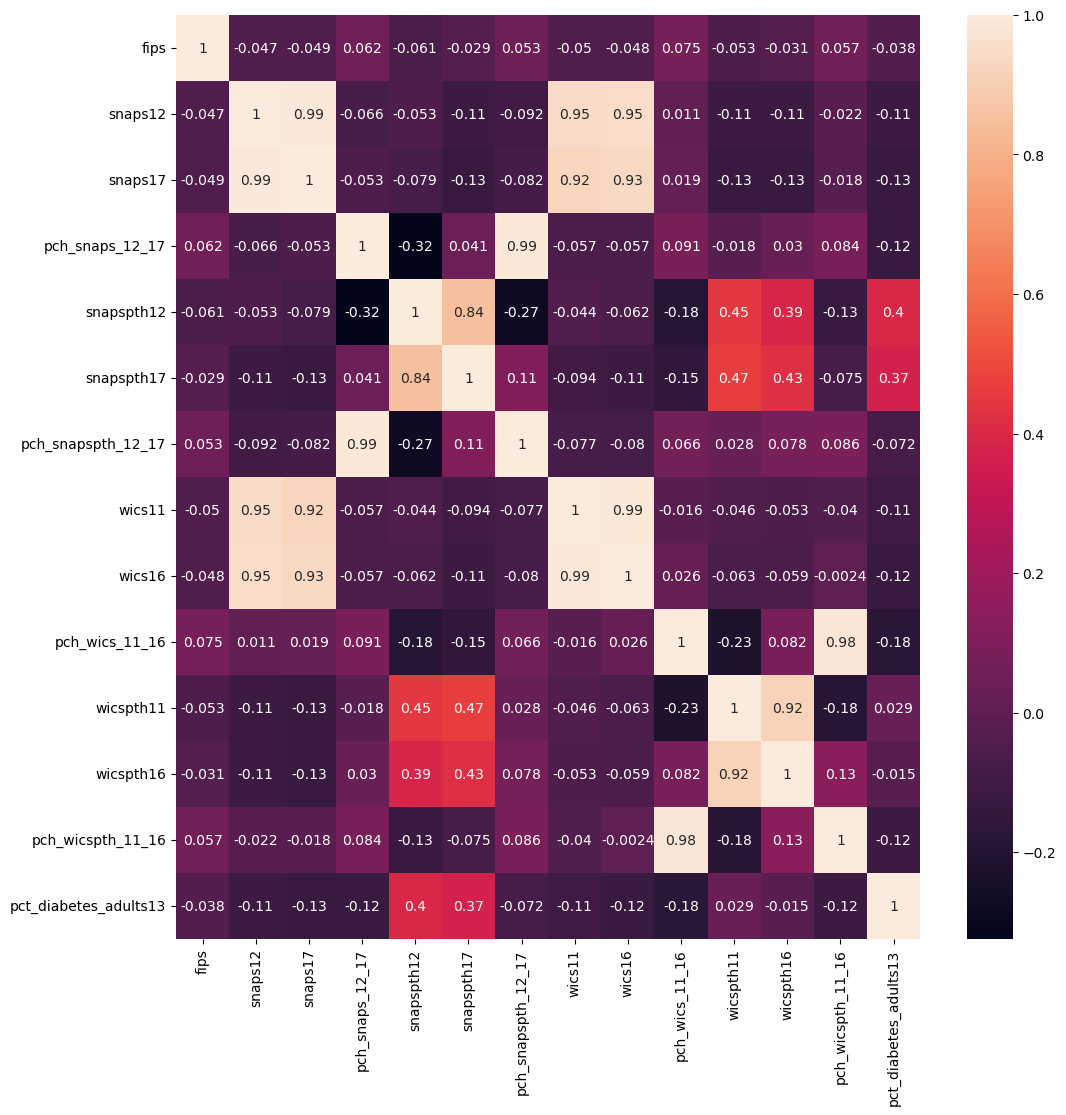

In [100]:
fig, ax = plt.subplots(figsize = (12, 12))

sns.heatmap(stores_snap_wic.corr(), annot=True);

The number of SNAP-authorized stores per 1000 population (snapspth) correlate with prevalence of diabetes at values of 0.4 and 0.37 respectively. 

### Summary

The number of grocery stores and supercenters seemed to be only weakly correlated with prevalence of diabetes. The number of convenience stores per 1000 people in a county had a fair correlation of ~0.25 with prevalence of diabetes, and the number of specialized food stores per 1000 people in a county had a fair correlation of ~0.21 with the prevalence of diabetes, suggesting that perhaps the types of foods available to people in a county have an impact on the prevalence of diabetes.

In the Stores dataset, the variable most highly correlated with prevalence of diabetes was the number of stores per 1000 people that accept SNAP. It makes sense that counties with a higher number of SNAP participants will have a larger number of SNAP-authorized stores. Meanwhile, we have seen that higher prevalence of poverty tends to predict a higher prevalence of diabetes. Thus, this seems to be another reminder that poorer counties may tend to have a higher prevalence of diabetes.

I will move on to discuss the Supplemental County dataset.

##### Case Study

In [101]:
#creates a subset of Eagle County, CO and Lowndes County, GA

case_stores = stores.loc[(stores['county'] == 'Eagle') | ((stores['county'] == 'Lowndes') 
                                                                      & (stores['state'] == 'AL'))]

case_stores #displays subset

fips state   county  groc11  groc16  pch_groc_11_16  grocpth11  \
42   1085    AL  Lowndes       2       2            0.00   0.179695   
263  8037    CO    Eagle      16      17            6.25   0.308333   

     grocpth16  pch_grocpth_11_16  superc11  ...  snapspth12  snapspth17  \
42    0.195293           8.680793         0  ...    1.535108    1.315006   
263   0.312707           1.418678         2  ...    0.300407    0.328635   

     pch_snapspth_12_17  wics11  wics16  pch_wics_11_16  wicspth11  wicspth16  \
42           -14.337882     4.0     2.0           -50.0   0.359099   0.195065   
263            9.396464     8.0     7.0           -12.5   0.153633   0.128254   

     pch_wicspth_11_16  pct_diabetes_adults13  
42          -45.679314                   23.5  
263         -16.519173                    3.3  

[2 rows x 40 columns]

In [102]:
case_stores_df = pd.DataFrame(case_stores)

*Number of stores accepting SNAP per 1000 population*

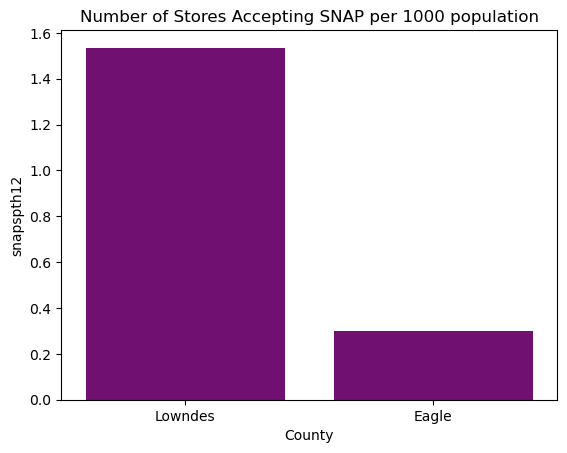

In [103]:
sns.barplot(data=case_stores_df, x='county', y='snapspth12', color = 'purple').set(
    title = 'Number of Stores Accepting SNAP per 1000 population', xlabel = 'County', label = 'Stores per 1000 pop.');

##### Observations

Lowndes County has a higher number of SNAP-accepting stores per 1000 people.

## IX. Supplemenal Data - County

As mentioned previously, this dataset contains raw numbers of county populations. The data will not be analyzed here.

## X. Supplemental Data - State

As mentioned previously, this dataset contains raw numbers of participants in state programs. The data will not be analyzed here.

## XI. Taxes

Although the variables within this dataset are state-level, they may still have an observable effect on the prevalence of diabetes in counties. Previous analysis showed that the prevalence of obesity may be higher in states with a higher tax on soda, and that higher prevalence of obesity correlates with higher prevalence of diabetes.

I will observe below for more information.

In [104]:
file_path = '../data/FoodEnvironmentAtlas.xls.TAXES_CLEAN.csv'

taxes = pd.read_csv(file_path)

In [105]:
taxes.head()

fips state   county  sodatax_stores14  sodatax_vendm14  chipstax_stores14  \
0  1001    AL  Autauga               4.0              4.0                4.0   
1  1003    AL  Baldwin               4.0              4.0                4.0   
2  1005    AL  Barbour               4.0              4.0                4.0   
3  1007    AL     Bibb               4.0              4.0                4.0   
4  1009    AL   Blount               4.0              4.0                4.0   

   chipstax_vendm14  food_tax14  
0               4.0         4.0  
1               4.0         4.0  
2               4.0         4.0  
3               4.0         4.0  
4               4.0         4.0

In [106]:
taxes.shape

(3143, 8)

#### Distribution - Food Tax (2014)

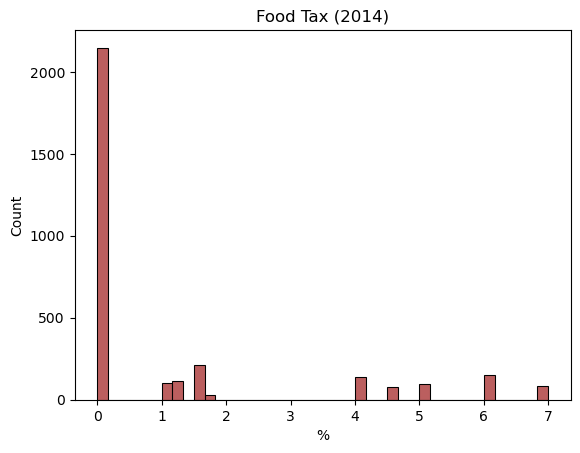

In [107]:
sns.histplot(data=taxes, x= 'food_tax14', color = 'brown').set(title = 'Food Tax (2014)', xlabel = '%');

It appears that most commonly, there was no tax on food in 2014. However, some states had a food tax as high as 7%.

#### Correlations

First, I will add the diabetes prevalence information into the dataset in order to observe correlations.

In [108]:
taxes['pct_diabetes_adults13'] = health['pct_diabetes_adults13']

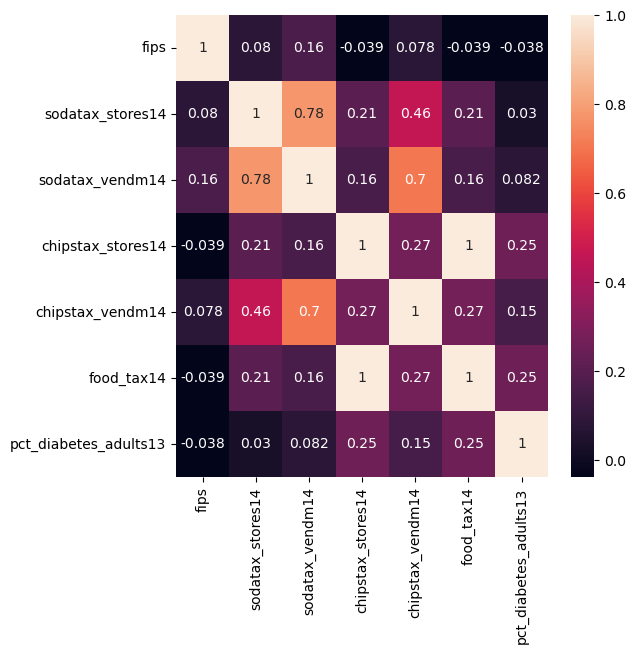

In [109]:
fig, ax = plt.subplots(figsize= (6,6))

sns.heatmap(taxes.corr(), annot=True);

It appears that the correlations between soda tax and prevalence of diabetes are weak.

However, there are fair correlations (0.25) between chips tax and food tax respectively with prevalence of diabetes.

I will add an additional conjecture regarding these relationships to the one I suggested previously: perhaps the higher tax on food makes food overall less affordable in certain counties, making them turn to cheaper food items (chips, soda, e.t.c.) with high caloric, and/or sugar content, making the prevalence of diabetes higher.

##### Case Study

In [110]:
#creates a subset of Eagle County, CO and Lowndes County, GA

case_taxes = taxes.loc[(taxes['county'] == 'Eagle') | ((taxes['county'] == 'Lowndes') 
                                                                      & (taxes['state'] == 'AL'))]

case_taxes #displays subset

fips state   county  sodatax_stores14  sodatax_vendm14  \
42   1085    AL  Lowndes              4.00             4.00   
263  8037    CO    Eagle              2.91             2.91   

     chipstax_stores14  chipstax_vendm14  food_tax14  pct_diabetes_adults13  
42                 4.0               4.0         4.0                   23.5  
263                0.0               0.0         0.0                    3.3

In [111]:
case_taxes_df = pd.DataFrame(case_taxes)

*Food Tax (2014)*

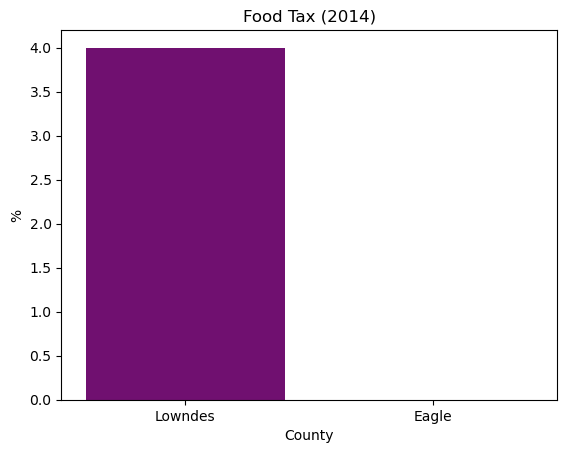

In [112]:
sns.barplot(data= case_taxes_df, x='county', y='food_tax14', color ='purple').set(
    title = 'Food Tax (2014)', xlabel = 'County', ylabel = '%');

##### Observations

Lowndes County has a food tax of 4%, whereas Eagle County has no general food tax. This may signify that food is relatively more expensive in Lowndes County, causing people to eat cheaper foods - which are often [less healthy](https://www.hsph.harvard.edu/news/press-releases/healthy-vs-unhealthy-diet-costs-1-50-more/).

It is also interesting to note in the dataframe above that there does seem to be a tax on soda in Eagle County. Research suggests that at times, a [soda tax](https://www.urban.org/policy-centers/cross-center-initiatives/state-and-local-finance-initiative/state-and-local-backgrounders/soda-taxes) is applied in order to discourage residents from drinking soda due to its health effects.

### Diabetes Atlas - 2018

This dataset contains only 2 variables: state and prevalence of diabetes. As it is not feasible to plot the prevalences of diabetes per county (there are 3,143 of them,) I will show the average prevalence of diabetes by state.

In [113]:
file_path = '../data/DiabetesAtlasData_CLEAN.csv'

d18 = pd.read_csv(file_path)

In [114]:
d18.head()

fips   county    state  pct_diabetes18
0  1001  Autauga  Alabama             9.5
1  1003  Baldwin  Alabama             8.4
2  1005  Barbour  Alabama            13.5
3  1007     Bibb  Alabama            10.2
4  1009   Blount  Alabama            10.5

In [115]:
d18.shape

(3141, 4)

#### Distribution - Prevalence of Diabetes in 2018

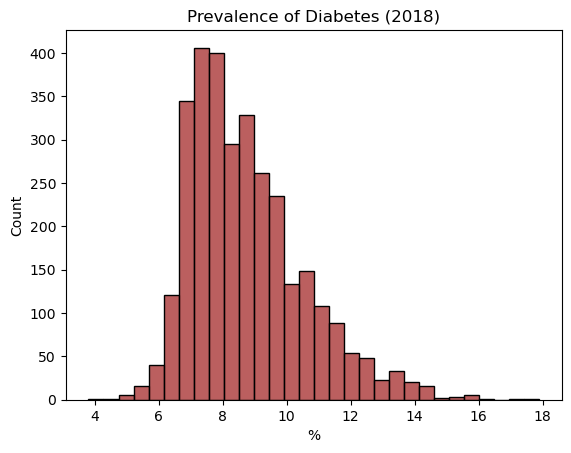

In [116]:
sns.histplot(data= d18, x= 'pct_diabetes18', bins = 30, color = 'brown').set(
title= 'Prevalence of Diabetes (2018)', 
    xlabel = '%');

There is a fairly wide spread of values, ranging from less than 4% to approximately 18%. The most common values appear to be approximately 6 to 10%.

#### Prevalence of Diabetes by State

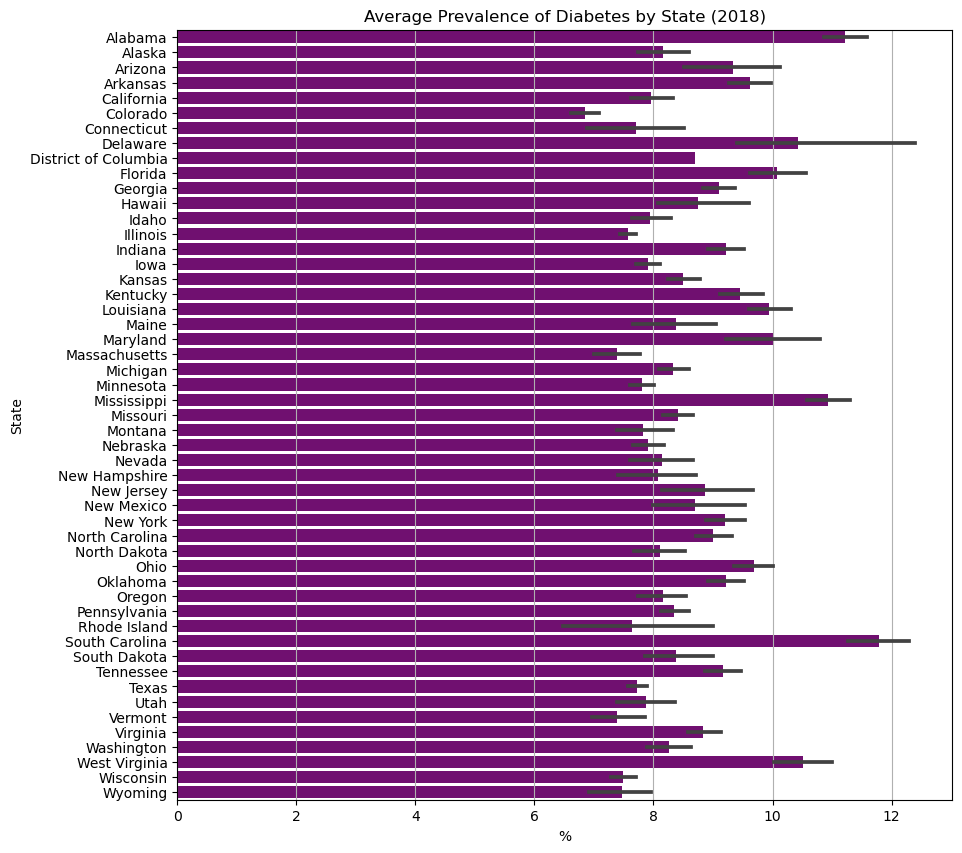

In [117]:
fig, ax = plt.subplots(figsize = (10, 10))

plt.grid()

sns.barplot(data=d18, x='pct_diabetes18', y='state', orient= 'h', color = 'purple').set(
title= 'Average Prevalence of Diabetes by State (2018)', xlabel = '%', ylabel = 'State');

Visualized this way, it becomes clear that states with a high average prevalence of diabetes include South Carolina, Alabama, Mississipi, West Virginia, and Delaware.

##### Case Study

In looking at the bar chart above, it can be seen that Alabama (home of Lowndes County) has one of the highest prevalences of diabetes, whereas Colorado (home of Eagle County) appears to have the lowest. 

### Mental Health Practitioners (State)

Here, I will show the numbers per 100,000 population by state for 2018.

In [118]:
file_path = '../data/state_mh_providers.csv'

mhp = pd.read_csv(file_path)

In [119]:
mhp.head()

state rank18  per100th18 rank17  per100th17
0     Alabama     50        92.6     50        85.0
1      Alaska      7       391.2      8       364.2
2     Arizona     47       129.3     47       121.9
3    Arkansas     27       226.0     26       213.3
4  California     11       338.0     10       315.5

#### Distribution - Number of MH Practitioners per 100,000 (2018)

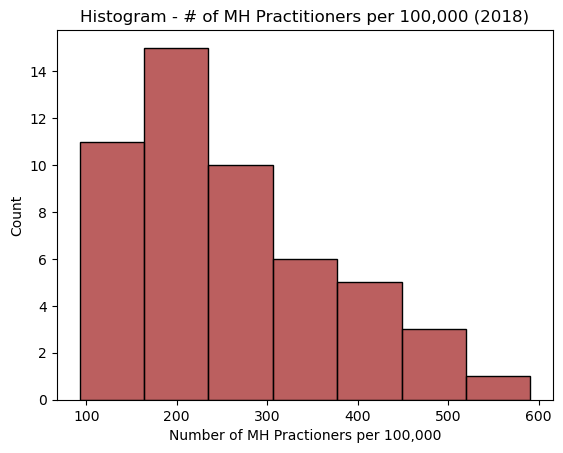

In [120]:
sns.histplot(data=mhp, x = 'per100th18', color = 'brown').set(
    title = 'Histogram - # of MH Practitioners per 100,000 (2018)', xlabel = 'Number of MH Practioners per 100,000');

It appears that states commonly had approximately 200 mental health practitioners per 100,000 population.

#### Number of MH Practitioners by State

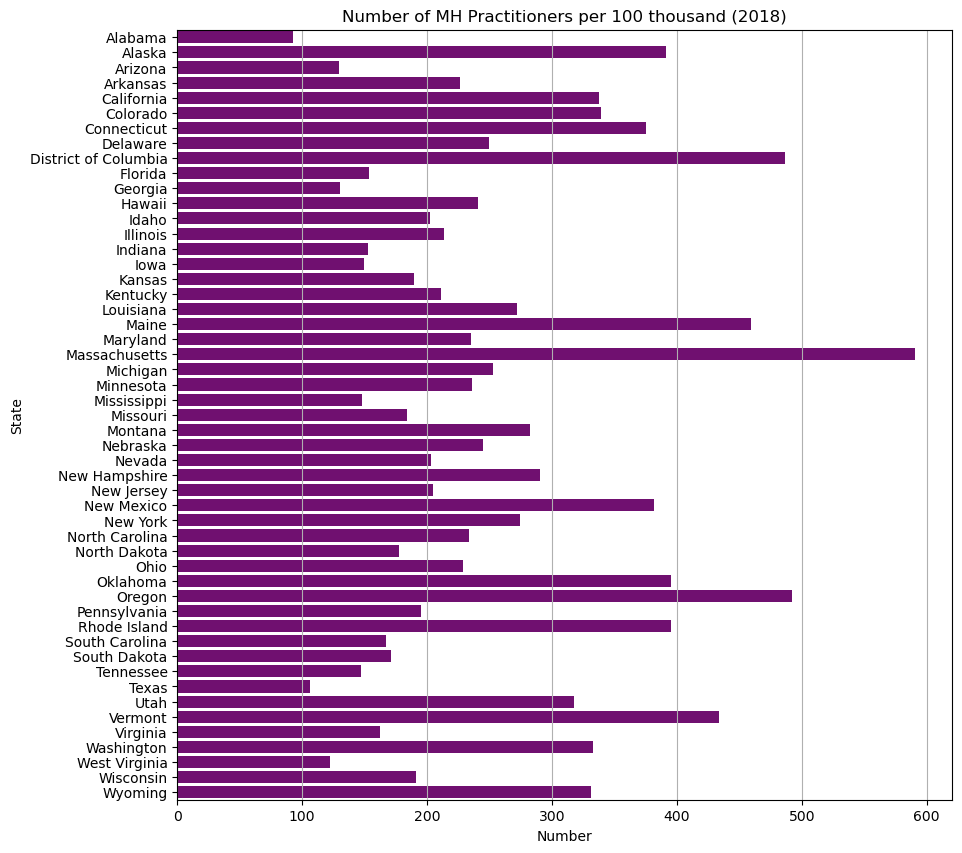

In [121]:
fig, ax = plt.subplots(figsize = (10,10))

plt.grid()

sns.barplot(data = mhp, x='per100th18', y='state', orient= 'h', color = 'purple').set(
title= 'Number of MH Practitioners per 100 thousand (2018)', xlabel = 'Number', ylabel = 'State');

##### Case Study

Alabama has a lower number of mental health practitioners per 100,000 than Colorado, indicating that mental health treatment may have been less accessible to the Lowdnes County population than to the Eagle County population. 

### Mental Health Services (State)

I will show a distribution of the 18 and older percentages of the state populations receiving mental health services (2016,) and then a barplot of the same group receiving mental health services by state.

In [122]:
file_path = '../data/NSDUH_RcvdMHServes2016_CLEAN.csv'

mhs = pd.read_csv(file_path)

In [123]:
mhs.head()

state  age18plus  age18_25  age26plus
0     Alabama       13.0      11.0       13.0
1      Alaska       14.0      13.0       14.0
2     Arizona       12.0      10.0       12.0
3    Arkansas       16.0      13.0       16.0
4  California       12.0      10.0       12.0

#### Distribution - % of Population Receiving MH Services in the Past Year - Ages 18+  (2016)

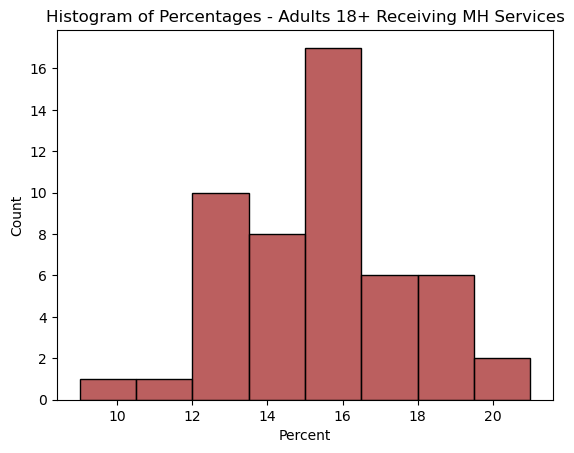

In [124]:
sns.histplot(data= mhs, x= 'age18plus', color = 'brown').set(
title= 'Histogram of Percentages - Adults 18+ Receiving MH Services', xlabel = 'Percent');

It appears that approximately 16% is a common value for the percentage of adults ages 18+ receiving mental health services.

Next, I will show a barplot for all states of the ages 26+ group.

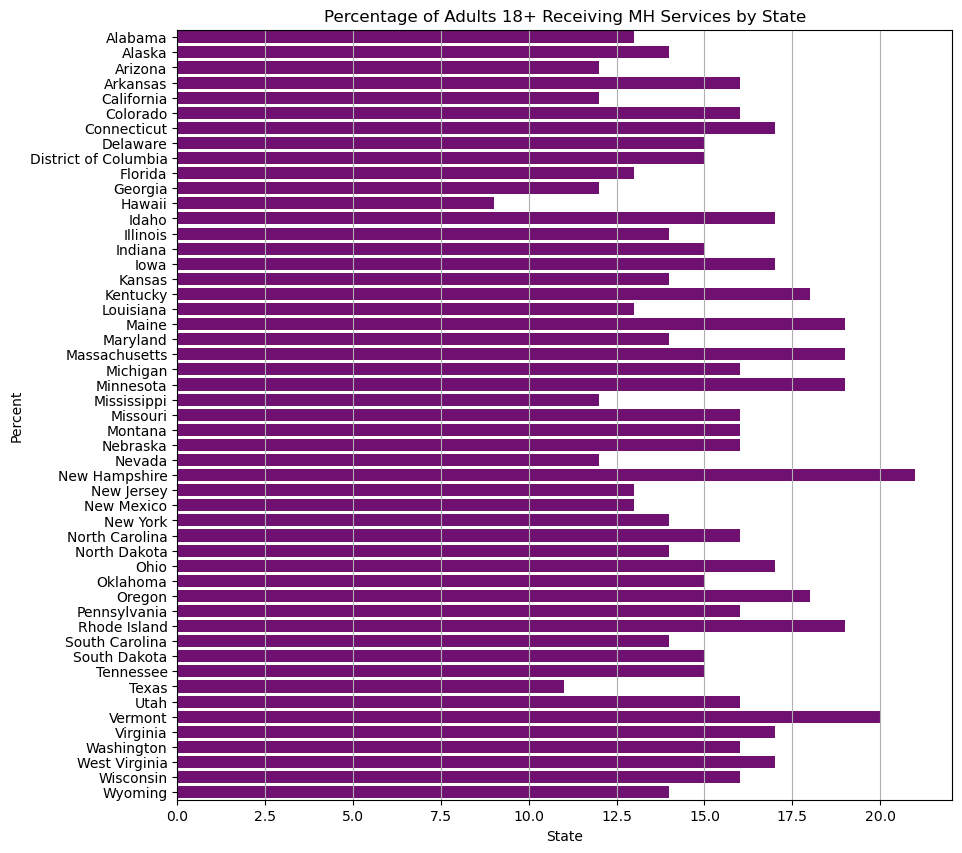

In [125]:
fig, ax = plt.subplots(figsize = (10,10))

plt.grid()

sns.barplot(data= mhs, x= 'age18plus', y='state', color = 'purple', orient = 'h').set(
title= 'Percentage of Adults 18+ Receiving MH Services by State', xlabel = 'State', ylabel= 'Percent');

In this case, New Hampshire is the clear winner, with the highest percentage of adults receiving mental health treatment. 

##### Case Study

While Alabama does not have the highest percentage of adults receiving mental health treatment, it does not have the lowest. Still, there is a lower percentage of adults receiving mental health treatment in Alabama than in Colorado, again suggesting that mental health treatment may have been less accessible (or in this case, perhaps just less utilized/reported) than to those in Eagle County.

## Discussion

Each dataset contains values that correlate with prevalence of diabetes at a value of at least positive or negative 0.2 (except for the mental health variables, which will require further processing before the correlations can be determined.)

The variables most highly correlated with prevalence of diabetes are obesity, and some of the poverty-related variables, such as median income and persistent poverty. It seems that farmer's markets, farming acres, and specialty stores are among those variables that are negatively correlated with prevalence of diabetes, meaning that as their numbers increase, the prevalence of diabetes decreases.

The case study of Lowdnes and Eagle Counties shows that the correlations appear to hold true, as they followed the predicted pattern of values that one might anticipate based on their vastly different prevalences of diabetes.

I will create models at a later time in order to determine the optimal way to predict diabetes as concerns food environment features. First, however, there are still the issues of null values, and a target variable whose counties do not match exactly with those represented in the Food Environment Atlas.

I resolve these issues during feature selection and modification, which are the subjects of the next notebook.